<h1><center> NLP AI PROJECT :</center></h1>
<h1><font color=red><center>Recommentation system for risk project management</center></font></h1>

<h3><font color=darkblue>Team Members: </font></h3> 

* Houssein Amorri    
* Khalil Bouchenk
* Faiçal Ghozzi

## <font color=green>Tools and technologies used : </font>


The steps we are gowing to do in our projet are as follow
* **
* **Phase 1: PreProcessing**

    * **Data Extraction and cleaning**: we used basics python methods and regular expressions to extract our data from our primary PDF PMBOK as well as clean to get more understandable data.
    * **NLP Methods**: to get better and more clean data we then use well known nlp techniques such as :
        * **Stop words removal**: aims to remove some stop words from the text, words which have no significant relevance and can be removed from the documents.
        * **Tokenization**: is the task of breaking a character sequence up into pieces (words/phrases) called tokens.
        * **Part of Speech Tagging**: tags for each word (whether the word is a noun, verb, adjective, etc.).
        * **Lemmatization**: The process of finding the lemma of a word depending on its meaning and context. Aims to remove inflectional endings.
        * **Chunking**: used to categorize different tokens into the same chunk. The result will depend on the grammar which has been selected.
        * **N-Gram**: a contiguous sequence of N items from a given sample of text or speech. Here an item can be a character, a word or a sentence and N can be any integer.
        * **Spacy Matcher Patterns:** We can easily access and analyze the surrounding tokens, merge spans into single tokens or add entries to the named entities
        * **Synonyms:** we can detect used synonyms to get rid of repetition as well as create a generic word for all of them

* **      
* **Phase 2: Enrichment**
* After getting all of the needed data from our first PDF PMBOK we are gonna enrich it with some additional data but this time using PMI
    * **Data Extraction,cleaning and NLP methods:** in this part we are gonna redo all the work we did in the previous phase but on the new data sample.
    * **Cosine-Similarity:** by using cosine-similarty we can compare the data we got from PMBOK with our new data to add the ones not present in our DataFrame only.
* **
* **Phase 3: OWL Generation**
* After getting all the date we need we general the Onotology from our DataFrame to get better Visualisation on our data as well as visualise the relations between our data
    * **RDFLib :** is a Python library for working with RDF, a simple yet powerful language for representing information.
    * **ROUGE :** is a Python library that allows to evaluate our OWL file.
* ** 
* **Phase 4: Recommendation System**
* This is the final part of our project and our primary goal, here we will create an algorithm base recommendation function
* **Phase 5: Deployment**
* After finishing all the previous steps we can  now deploy our work into a web framework which will be Django in our case

**Further explanations are provided below**

As present under these are all the libraries we used throughout the entirety of our work :

In [1]:
import pdfplumber
import PyPDF2
import numpy as np
import pandas as pd
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer 
from strsimpy.jaro_winkler import JaroWinkler
from sklearn.feature_extraction.text import CountVectorizer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder 
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk.collocations import QuadgramAssocMeasures, QuadgramCollocationFinder
from collections import namedtuple
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, brown, wordnet
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer , CountVectorizer 
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 
import en_core_web_sm
import rdflib
from rdflib	import Namespace
from owlready2 import *
import os
import spacy



* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


<h1><font color=darkred>Phase 1 : </font></h1> 
<h2> Pre-processing and parsing data from unstructured text </h2>

### Text Segmentation
Our PDF presents six different processes in the Projet Risk Management part which is why we will first divide our data into these six processes

In [2]:
def process_segmentation(separateur) :
    ch=''
    names = ''
    start = 0
    process_df = pd.DataFrame(columns=['Process Name','start', 'Corpus'])

    with pdfplumber.open("PMBOK.pdf") as pdf:
        for i in range(338,380) :
            page = (pdf.pages[i]).extract_text()
            for line in page.split('\n') :

                if re.match('\d{2}.\d\s[A-Za-z]+\s[A-Za-z]',line) :

                    if start != 0 :
                        process_df = process_df.append({'Process Name': name,'start':start, 'Corpus': ch[1:]} ,
                                                       ignore_index=True)

                    ch = ''                    
                    start = i
                    name = line[5:]

                ch=ch+separateur+line


        process_df = process_df.append({'Process Name': name,'start':start, 'Corpus': ch[1:]} ,
                                                       ignore_index=True)  
        return (process_df)
        

In [3]:
process_df = process_segmentation('. ')
process_df

,Process Name,start,Corpus
0,Plan risk Management,338,11.1 Plan risk Management. Plan Risk Manageme...
1,Identify risks,344,11.2 Identify risks. Identify Risks is the pr...
2,Perform Qualitative risk Analysis,353,11.3 Perform Qualitative risk Analysis. Perfo...
3,Perform Quantitative risk Analysis,358,11.4 Perform Quantitative risk Analysis. Perf...
4,Plan risk responses,367,11.5 Plan risk responses. Plan Risk Responses...
5,control risks,374,11.6 control risks. Control Risks is the proc...


In [4]:
process1 = process_df['Corpus'][0]

In [5]:
process2 = process_df['Corpus'][1]

In [6]:
process3 = process_df['Corpus'][2]

In [7]:
process4 = process_df['Corpus'][3]

In [8]:
process5 = process_df['Corpus'][4]

In [9]:
process6 = process_df['Corpus'][5]

In [10]:
corpus = process1 + process2 + process3 + process4 + process5 + process6

### Data Hierarchy
All of our processes follow a specific structure which is why we will divide our data as follow : 
inputs, tools and techniques, outputs and subtitles which will then be our concepts.

In [11]:
ch=''
with pdfplumber.open("pmbok.pdf") as temp:
    for i in range(339,379) :
        first_page = temp.pages[i]
        ch=ch+first_page.extract_text()


To get this structure we will use some regular expressions 

In [12]:
inputs_titles = re.compile(r'\d+\..+: Inputs\n')
tools_and_techniques = re.compile(r'\d+\..+: tools and techniques\n')
outputs_titles = re.compile(r'\d+\..+: outputs\n')
get_subtiltles = re.compile(r'[^|\n](\d+\.){2,4}\d+ [a-z|\s|A-Z]+(\d+)?\n')
title = re.compile(r'\d+ (.+): Inputs\n')
Concept_desc=re.compile(r'(Described in) (Section (\d+\.)+)')

In [13]:
def concept_sec(lst,prcocess,type,ch) :
    print("Fonction :")
    print(lst)
    lst_conc = [elem for elem in lst]
    print(lst_conc)
    i=0
    l=[]
    for sec in range(0,len(lst_conc)):
        if i == (len(lst_conc)-1):
      
            str_between = ch[int(lst_conc[i].span()[0]):]
      
     
        else :
            str_between = ch[int(lst_conc[i].span()[0]):int(lst_conc[i+1].span()[0])]
        
        if(Concept_desc.search(str_between)):
            domaine = lst_conc[i].group().split('\n')[0]
            domaine=domaine.replace('\n','')
            domaine = re.sub(r'[*\d]', '', domaine)
            domaine=domaine.replace('.','')
            domaine = re.sub(r"^\s+|\s+$", "", domaine)
            dict = {'Process': prcocess , 'Domaine' : domaine ,'Type':type ,'Data Property' : Concept_desc.search(str_between).group(1) ,'Range' : Concept_desc.search(str_between).group(2)}
            l.append(dict)
            
        i=i+1

    return l


In [14]:
sections = inputs_titles.finditer(ch)
prs = []


inputs = []
inputsN = []
tt = []
ttN = []
outputss=[]
outputssN=[]
lst_sec = [elem for elem in sections]
liste_concept_section=[]
for i in range(0,len(lst_sec)):
    if i == (len(lst_sec)-1): 
        print(lst_sec[i].group())
        print("processus : ", title.search(lst_sec[i].group()).group(1))
        prs.append(title.search(lst_sec[i].group()).group(1))
        str_between = ch[int(lst_sec[i].span()[1]):]
        t_and_t = tools_and_techniques.search(str_between)
        ch_inputs_techniques = str_between[:int(t_and_t.span()[0])]
        lst_sub_inputs = get_subtiltles.finditer(ch_inputs_techniques)
        lst_sub_inputs2 = get_subtiltles.finditer(ch_inputs_techniques)
        lst2 = [a.group().split('\n')[0] for a in lst_sub_inputs]
        l=list()
        l1=list()
        nom_input = "p"+str(i+1)+"_inputs"
        nom_inputN = "p"+str(i+1)+"_inputsN"
        l.append(nom_input)
        l1.append(nom_inputN)
        
        
        for j in lst2 :
            l1.append(j)
            a=j
            a=a.replace('\n','')
            a = re.sub(r'[*\d]', '', a)
            a=a.replace('.','')
            a = re.sub(r"^\s+|\s+$", "", a)
            l.append(a)

            print("\t"+j)
        inputs.append(l)
        inputsN.append(l1)
        section_inputs = concept_sec(lst_sub_inputs2,title.search(lst_sec[i].group()).group(1),"Input",ch_inputs_techniques)
        liste_concept_section.append(section_inputs)       

        print(t_and_t.group())
        outputs = outputs_titles.search(str_between)
        ch_techniques_outputs = str_between[int(t_and_t.span()[1]):int(outputs.span()[0])]
        lst_sub_tt = get_subtiltles.finditer(ch_techniques_outputs)
        lst2 = [a.group().split('\n')[0] for a in lst_sub_tt]
        l=list()
        l1=list()
        nom_tt = "p"+str(i+1)+"_tt"
        nom_ttN = "p"+str(i+1)+"_ttN"
        l.append(nom_tt)
        l1.append(nom_ttN)
        for j in lst2 :
            l1.append(j)
            a=j
            a=a.replace('\n','')
            a = re.sub(r'[*\d]', '', a)
            a=a.replace('.','')
            a = re.sub(r"^\s+|\s+$", "", a)
            l.append(a)

            print("\t"+j)
        tt.append(l)
        ttN.append(l1)

        print(outputs.group())
        ch_outputs = str_between[int(outputs.span()[1]):]
        lst_sub_outputs = get_subtiltles.finditer(ch_outputs)
        lst2 = [a.group().split('\n')[0] for a in lst_sub_outputs]
        l=list()
        l1=list()
        
        nom_output = "p"+str(i+1)+"_outputs"        
        nom_outputN = "p"+str(i+1)+"_outputsN"
        l.append(nom_output)
        l1.append(nom_outputN)
        for j in lst2 :
            l1.append(j)
            a=j
            a=a.replace('\n','')
            a = re.sub(r'[*\d]', '', a)
            a=a.replace('.','')
            a = re.sub(r"^\s+|\s+$", "", a)
            l.append(a)

            print("\t"+j)
        outputss.append(l)
        outputssN.append(l1)

    else:
        print(lst_sec[i].group())
        prs.append(title.search(lst_sec[i].group()).group(1))
        str_between = ch[int(lst_sec[i].span()[1]):int(lst_sec[i+1].span()[0])]
        t_and_t = tools_and_techniques.search(str_between)
        ch_inputs_techniques = str_between[:int(t_and_t.span()[0])]
        lst_sub_inputs = get_subtiltles.finditer(ch_inputs_techniques)
        lst_sub_inputs2 = get_subtiltles.finditer(ch_inputs_techniques)
        lst2 = [a.group().split('\n')[0] for a in lst_sub_inputs]
        l=list()
        l1=list()
        nom_input = "p"+str(i+1)+"_inputs"
        nom_inputN = "p"+str(i+1)+"_inputsN"
        l.append(nom_input)
        l1.append(nom_inputN)
        for j in lst2 :
            l1.append(j)
            a=j
            a=a.replace('\n','')
            a = re.sub(r'[*\d]', '', a)
            a=a.replace('.','')
            a = re.sub(r"^\s+|\s+$", "", a)
            l.append(a)

            print("\t"+j)
        inputs.append(l)
        inputsN.append(l1)
        
        section_inputs = concept_sec(lst_sub_inputs2,title.search(lst_sec[i].group()).group(1),"Input",ch_inputs_techniques)
        liste_concept_section.append(section_inputs)
                
        print(t_and_t.group())
        outputs = outputs_titles.search(str_between)
        ch_techniques_outputs = str_between[int(t_and_t.span()[1]):int(outputs.span()[0])]
        lst_sub_tt = get_subtiltles.finditer(ch_techniques_outputs)
        lst2 = [a.group().split('\n')[0] for a in lst_sub_tt]
        l=list()
        l1=list()
        nom_tt = "p"+str(i+1)+"_tt"
        nom_ttN = "p"+str(i+1)+"_ttN"
        l.append(nom_tt)
        l1.append(nom_ttN)
        for j in lst2 :
            l1.append(j)
            a=j
            a=a.replace('\n','')
            a = re.sub(r'[*\d]', '', a)
            a=a.replace('.','')
            a = re.sub(r"^\s+|\s+$", "", a)
            l.append(a)

            print("\t"+j)
        tt.append(l)
        ttN.append(l1)
        
        
        
        print(outputs.group())
        ch_outputs = str_between[int(outputs.span()[1]):]
        lst_sub_outputs = get_subtiltles.finditer(ch_outputs)
        lst2 = [a.group().split('\n')[0] for a in lst_sub_outputs]
        l=list()
        l1=list()
        nom_output = "p"+str(i+1)+"_outputs"        
        nom_outputN = "p"+str(i+1)+"_outputsN"
        l.append(nom_output)
        l1.append(nom_outputN)
        for j in lst2 :
            l1.append(j)
            a=j
            a=a.replace('\n','')
            a = re.sub(r'[*\d]', '', a)
            a=a.replace('.','')
            a = re.sub(r"^\s+|\s+$", "", a)
            l.append(a)

            print("\t"+j)
        outputss.append(l)
        outputssN.append(l1)
        print('-'*70)

11.1.1 Plan risk Management: Inputs

	11.1.1.1 Project Management Plan
	11.1.1.2 Project charter
	11.1.1.3 Stakeholder register
	11.1.1.4 Enterprise Environmental Factors
	11.1.1.5 organizational Process Assets
Fonction :
[<re.Match object; span=(0, 33), match='11.1.1.1 Project Management Plan\n'>, <re.Match object; span=(419, 444), match='11.1.1.2 Project charter\n'>, <re.Match object; span=(610, 640), match='11.1.1.3 Stakeholder register\n'>, <re.Match object; span=(801, 843), match='11.1.1.4 Enterprise Environmental Factors\n'>, <re.Match object; span=(1108, 1147), match='11.1.1.5 organizational Process Assets\n'>]
11.1.2 Plan risk Management: tools and techniques

	11.1.2.1 Analytical techniques
	11.1.2.2 Expert Judgment
	11.1.2.3 Meetings
11.1.3 Plan risk Management: outputs

	11.1.3.1 risk Management Plan
----------------------------------------------------------------------
11.2.1 Identify risks: Inputs

	11.2.1.1 risk Management Plan 11
	11.2.1.2 cost Management Plan
	11.2.1.3 

In [15]:
df_concept_section = pd.DataFrame()
for elem in liste_concept_section:
    temp = pd.DataFrame.from_dict(elem)
    df_concept_section = pd.concat([df_concept_section,temp],ignore_index=True)

In [16]:
df_concept_section

,Process,Domaine,Type,Data Property,Range
0,Plan risk Management,Project charter,Input,Described in,Section 4.1.3.1.
1,Plan risk Management,Stakeholder register,Input,Described in,Section 13.1.3.1.
2,Plan risk Management,Enterprise Environmental Factors,Input,Described in,Section 2.1.5.
3,Plan risk Management,organizational Process Assets,Input,Described in,Section 2.1.4.
4,Identify risks,risk Management Plan,Input,Described in,Section 11.1.3.1.
5,Identify risks,cost Management Plan,Input,Described in,Section 7.1.3.1.
6,Identify risks,Schedule Management Plan,Input,Described in,Section 6.1.3.1.
7,Identify risks,Quality Management Plan,Input,Described in,Section 8.1.3.1.
8,Identify risks,Human resource Management Plan,Input,Described in,Section 9.1.3.1.
9,Identify risks,Scope Baseline,Input,Described in,Section 5.4.3.1.


In [17]:
for i in inputsN:
  
    a=i[0]
    del(i[0])
  
    
    exec('%s = %s' %(a, i[:]))

p6_inputsN

['11.6.1.1 Project Management Plan',
 '11.6.1.2 risk register',
 '11.6.1.3 Work Performance data',
 '11.6.1.4 Work Performance reports']

In [18]:
for i in outputssN:
  
    a=i[0]
    del(i[0])
  
  
    exec('%s = %s' %(a, i[:]))
p6_outputsN

['11.6.3.1 Work Performance Information',
 '11.6.3.2 change requests',
 '11.6.3.3 Project Management Plan updates']

In [19]:
for i in ttN:
  
    a=i[0]
    del(i[0])
  
  
    exec('%s = %s' %(a, i[:]))
p6_ttN

['11.6.2.1 risk reassessment',
 '11.6.2.2 risk Audits',
 '11.6.2.3 Variance and trend Analysis',
 '11.6.2.4 technical Performance Measurement',
 '11.6.2.5 reserve Analysis',
 '11.6.2.6 Meetings']

In [20]:
for i in inputs:
  
    a=i[0]
    del(i[0])
  
    
    exec('%s = %s' %(a, i[:]))

p6_inputs

['Project Management Plan',
 'risk register',
 'Work Performance data',
 'Work Performance reports']

In [21]:
for i in outputss:
  
    a=i[0]
    del(i[0])
  
  
    exec('%s = %s' %(a, i[:]))
p6_outputs

['Work Performance Information',
 'change requests',
 'Project Management Plan updates']

In [22]:
for i in tt:
  
    a=i[0]
    del(i[0])
  
  
    exec('%s = %s' %(a, i[:]))
p6_tt

['risk reassessment',
 'risk Audits',
 'Variance and trend Analysis',
 'technical Performance Measurement',
 'reserve Analysis',
 'Meetings']

### Definitions 
We will now extract the needed definitions from our PDF# Definitions :

In [23]:
reference = '\n A Guide to the Project Management Body of Knowledge (PMBOK\n® Guide) Œ Fifth Edition'
licence = 'Licensed To: Jorge Diego Fuentes Sanchez PMI MemberID: 2399412This copy is a PMI Member benefit, not for distribution, sale, or reproduction.'
clean = '© project management institute. a guide to the project management body of knowledge pmbok® guide – fifth edition . licensed to jorge diego fuentes sanchez pmi memberid'
clean2 = 'this copy is a pmi member benefit not for distribution sale or reproduction'
clean3="insignificant cost cost – cost – cost cost. cost. increase increase increase increase increase. insignificant time time – time – time time. time. increase increase increase increase increase."
s = '© project management institute. a guide to the project management body of knowledge pmbok® guide – fifth edition licensed to jorge diego fuentes sanchez pmi memberid .'
def cleaning01(text):
    text=text.replace(reference,'')
    text=text.replace(licence,'')
    for i in range (313,355):
        text=text.replace(str(i)+'©2013 Project Management Institute.','')
    text=text.replace('1111.',' ')
    text=text.replace('11.',' 11.')
    text=text.replace('˜',' ')
    text = text.replace("\nem", " ").replace("™", "'").replace("˚"," ").replace("œ", " ").replace("š"," ")
    text=text.replace('\n',' ') 
    text=text.lower()
    text=text.replace('human','human ').replace('management',' management ').replace('described',' described').replace('estimates','estimate').replace('estimate',' estimate ').replace('identify',' identify ').replace('techniques',' techniques ').replace('risks','risk').replace('risk',' risk ')
    text= text.translate(str.maketrans('', '','"#$%&\'()*+-/:;<=>@[\\]^_`{|}~'))
    text = re.sub(r'[*\d]', '', text)
    text = re.sub(' +', ' ', text)
    text = text.replace(clean,'').replace(clean2,'').replace('identify ing','identifying').replace(clean3,'').replace('such as.','such as')
    return text

In [24]:
reference = '\n A Guide to the Project Management Body of Knowledge (PMBOK\n® Guide) Œ Fifth Edition'
licence = 'Licensed To: Jorge Diego Fuentes Sanchez PMI MemberID: 2399412This copy is a PMI Member benefit, not for distribution, sale, or reproduction.'
clean = '© project management institute. a guide to the project management body of knowledge pmbok® guide – fifth edition . licensed to jorge diego fuentes sanchez pmi memberid'
clean2 = 'this copy is a pmi member benefit not for distribution sale or reproduction'
clean3="insignificant cost cost – cost – cost cost. cost. increase increase increase increase increase. insignificant time time – time – time time. time. increase increase increase increase increase."
s = '© project management institute. a guide to the project management body of knowledge pmbok® guide – fifth edition licensed to jorge diego fuentes sanchez pmi memberid .'

ref001 = '\n ©2013 Project Management Institute. A Guide to the Project Management Body of Knowledge (PMBOK® Guide) – Fifth Edition'
lic = '11 - PROJECT RISK MANAGEMENT'
disc='Described in Section'
def cleandef(text):
    text=text.replace(ref001,'')
    text=text.replace(lic,'')
    text=text.replace(disc,'')
    text=text.replace(reference,'')
    text=text.replace(licence,'')
    text=text.replace(s,'')

    text=text.replace('1111.',' ')
    text=text.replace('11.',' 11.')
    text=text.replace('˜',' ')
    text = text.replace("\nem", " ").replace("™", "'").replace("˚"," ").replace("œ", " ").replace("š"," ")
    text=text.replace('\n',' ') 

    text=text.replace('human','human ').replace('management',' management ').replace('described',' described').replace('estimates','estimate').replace('estimate',' estimate ').replace('identify',' identify ').replace('techniques',' techniques ').replace('risks','risk').replace('risk',' risk ')
    text= text.translate(str.maketrans('', '', '"#$%&\'()*+-/:;<=>@[\\]^_`{|}~'))
    text = re.sub(r'[*\d]', '', text)
    text = re.sub(' +', ' ', text)
    text = text.replace(clean,'').replace(clean2,'').replace('identify ing','identifying').replace(clean3,'').replace('such as.','such as')
    
    text = text.replace('..','')
    text = text.replace('...','')
    text = text.replace('....','')
    
    return text

First we start with the processes definition

In [25]:
Def_process = pd.DataFrame(columns=['def'],index =prs)

In [26]:
 corpusL=[process1,process2,process3,process4,process5,process6]

In [27]:
for k in range (0,6):
    i= corpusL[k] 
    j = prs[k] 
    str1=j+'(.*)The inputs, tools and '
    result = re.search(str1, i)
    Def_process.loc[j,['def']]=cleaning01(cleandef(result.group(1)[1:]))

In [28]:
Def_process

,def
Plan risk Management,plan risk management is the process of defini...
Identify risks,identify risk is the process of determining w...
Perform Qualitative risk Analysis,perform qualitative risk analysis is the proc...
Perform Quantitative risk Analysis,perform quantitative risk analysis is the pro...
Plan risk responses,plan risk responses is the process of develop...
control risks,control risk is the process of implementing r...


Then we extract the inputs definition

In [29]:
def inputs_DEF(n) :
    strin='11.'+str(n+1)+'.1 '+prs[n]+': Inputs(.*)'+prs[n]+': tools and techniques'
    p_in = re.search(strin, corpusL[n])
    prg_in=p_in.group(1)
    Def_in = pd.DataFrame(columns=['def'],index =inputs[n])
    
    for k in range(0,len(inputsN[n])-1) :
        ch= prg_in 
        j = inputs[n][k] 
        str1=inputsN[n][k]+'(.*)'+inputsN[n][k+1]
        result = re.search(str1, ch)
        Def_in.loc[j,['def']]=cleaning01(cleandef(result.group(1)[1:]))
    k=len(inputsN[n])-1
    j = inputs[n][k] 
    str1=inputsN[n][k]+'(.*)'
    result = re.search(str1, ch)
    Def_in.loc[j,['def']]=cleaning01(cleandef(result.group(1)[1:]))
    
    return Def_in
    
    

In [30]:
def_in1=inputs_DEF(0)
def_in2=inputs_DEF(1)
def_in3=inputs_DEF(2)
def_in4=inputs_DEF(3)
def_in5=inputs_DEF(4)
def_in6=inputs_DEF(5)

In [31]:
def_in4

,def
risk Management Plan,"the risk management plan provides guidelines,..."
cost Management Plan,the cost management plan provides guidelines ...
Schedule Management Plan,the schedule management plan provides guideli...
risk register,the risk register is used as a reference poin...
Enterprise Environmental Factors,. enterprise environmental factors may provid...
organizational Process Assets,. the organizational process assets that can ...


Then we extract the tools and techniques definition

In [32]:
def tt_DEF(n):
    strtt='11.'+str(n+1)+'.2 '+prs[n]+': tools and techniques(.*)'+prs[n]+': outputs'
    restt=re.search(strtt, corpusL[n])
    prg_tt=restt.group(1)
    Def_tt = pd.DataFrame(columns=['def'],index =tt[n])
    
    ch= prg_tt 
    for k in range(0,len(ttN[n])-1) :

        j = tt[n][k] 
        str1=ttN[n][k]+'(.*)'+ttN[n][k+1]
        #print(str1)
        result = re.search(str1, ch)
        Def_tt.loc[j,['def']]=cleaning01(cleandef(result.group(1)[1:]))
    k=len(ttN[n])-1
    j = tt[n][k] 
    str1=ttN[n][k]+'(.*)'
    #print(str1)
    result = re.search(str1, ch)
    Def_tt.loc[j,['def']]=cleaning01(cleandef(result.group(1)[1:]))
    
    return Def_tt 
    
    cleandef

    

In [33]:
def_tt1=tt_DEF(0)
def_tt2=tt_DEF(1)
def_tt3=tt_DEF(2)
def_tt4=tt_DEF(3)
def_tt5=tt_DEF(4)
def_tt6=tt_DEF(5)

Finally we extract the outputs definition

In [34]:
def outputs_DEF(n):
    
    strout='11.'+str(n+1)+'.3 '+prs[n]+': outputs(.*)'
    resout=re.search(strout, corpusL[n])
    prg_out=resout.group(1)
    Def_out = pd.DataFrame(columns=['def'],index =outputss[n])

    ch= prg_out 
    for k in range(0,len(outputssN[n])-1) :

        j = outputss[n][k] 
        str1=outputssN[n][k]+'(.*)'+outputssN[n][k+1]
        #print(str1)
        result = re.search(str1, ch)
        Def_out.loc[j,['def']]=cleaning01(cleandef(result.group(1)[1:]))
    k=len(outputssN[n])-1
    j = outputss[n][k] 
    str1=outputssN[n][k]+'(.*)'
    #print(str1)
    result = re.search(str1, ch)
    Def_out.loc[j,['def']]=cleaning01(cleandef(result.group(1)[1:]))
    
    return Def_out


In [35]:
def_out1=outputs_DEF(0)
def_out2=outputs_DEF(1)
def_out3=outputs_DEF(2)
def_out4=outputs_DEF(3)
def_out5=outputs_DEF(4)
def_out6=outputs_DEF(5)

## NLP Methods

### Data Cleaning
Before using our NLP methods with Spacy and NLTK we will first start by using regression methods on our data

In [36]:
reference = '\n A Guide to the Project Management Body of Knowledge (PMBOK\n® Guide) Œ Fifth Edition'
licence = 'Licensed To: Jorge Diego Fuentes Sanchez PMI MemberID: 2399412This copy is a PMI Member benefit, not for distribution, sale, or reproduction.'
clean = '© project management institute. a guide to the project management body of knowledge pmbok® guide – fifth edition . licensed to jorge diego fuentes sanchez pmi memberid'
clean2 = 'this copy is a pmi member benefit not for distribution sale or reproduction'
clean3="insignificant cost cost – cost – cost cost. cost. increase increase increase increase increase. insignificant time time – time – time time. time. increase increase increase increase increase."
s = '© project management institute. a guide to the project management body of knowledge pmbok® guide – fifth edition licensed to jorge diego fuentes sanchez pmi memberid .'
def cleaning(text):
    text=text.replace(reference,'')
    text=text.replace(licence,'')
    for i in range (313,355):
        text=text.replace(str(i)+'©2013 Project Management Institute.','')
    text=text.replace('1111.',' ')
    text=text.replace('11.',' 11.')
    text=text.replace('˜',' ').replace('•','')
    text = text.replace("\nem", " ").replace("™", "'").replace("˚"," ").replace("œ", " ").replace("š"," ")
    text=text.replace('\n',' ') 
    text=text.lower()
    text=text.replace('human','human ').replace('management',' management ').replace('described',' described').replace('estimates','estimate').replace('estimate',' estimate ').replace('identify',' identify ').replace('techniques',' techniques ').replace('risks','risk').replace('risk',' risk ')
    text= text.translate(str.maketrans('', '', '!"#$%&\'()*+,-/:;<=>@[\\]^_`{|}~'))
    text = re.sub(r'[*\d]', '', text)
    text = re.sub(' +', ' ', text)
    text = text.replace(clean,'').replace(clean2,'').replace('identify ing','identifying').replace(clean3,'').replace('such as.','such as')
    return text


Here we are agoing to call the cleaning function to clean the corpus of each process

In [37]:
corpus = cleaning(corpus)
process1=cleaning(process1)
process2=cleaning(process2)
process3=cleaning(process3)
process4=cleaning(process4)
process5=cleaning(process5)
process6=cleaning(process6)


## Stopwords 

We will first by removing the stopwords which are words that don't provide useful information to our text analysis procedures.

In [38]:
stopWords = stopwords.words('english')
sw = set(stopWords) -set([ "it's", 'who', 'whom', 'is','in','of','for','are', 'was', 'were', 'be',
    'being', 'have', 'has','an', 'had', 'having', 'do', 'does', 'did', 'doing',"a", 'other','or', 'some',  'no', 'not', 'own', 'same', 'can', 'don', "don't", 'should',
     'now','will','such','as','can'])
sw.add('the')
sw.add('that')

In [39]:
stopWords.append(['the','that'])

## Tokenization

After removing the stopwords we will divide our data into sentences first, then each sentence will be divided into tokens by using the NLTK list of english words.

In [40]:
def split_sentences(text):  
    text = re.split('[.?]', text)
    return text

In [41]:
def sentence_preprocessing(sentence):
    words = word_tokenize(sentence)
    words = [word for word in words if not word in sw]
    return words

In [42]:
def data_split(corpus) :
    data = []
    process = split_sentences(corpus)
    for sentence in process :
        if sentence  :
            l = sentence_preprocessing(sentence)
            if l :
                data.append(l) # word tokenization for each sentence
    return data

##  POS Tagging



It is responsible for text reading in a language and assigning some specific token (Parts of Speech) to each word. It is also called grammatical tagging.

In [43]:
#input liste de liste de tokens
def pos_tagging_nltk(tokens):
    return [nltk.pos_tag(w) for w in tokens if w]

## Lemmatization

We will now extract the lemma of each word in our sentence which is the root of each word.

In [44]:
def lemmatization(sent): 
    lemmatizer = WordNetLemmatizer()
    l = []
    for word, tag in sent :
        if word not in ['wbs','as'] :
            l.append((lemmatizer.lemmatize(word),tag))
        else :
            l.append((word,tag))

    return l


In [45]:
def process_sentences_after_cleaning(corpus):
    data=data_split(corpus)
    tagged = pos_tagging_nltk(data)
    lemm_tag = [lemmatization(sentence) for sentence in tagged]
    ch=""
    for l in lemm_tag :
        for w,k in l :
            ch=ch+" "+ w
        ch+='.'
    return ch

In [46]:
def lem_list(p1_inputs) :
    p1_inputsL=[]
    for l3 in p1_inputs :
        p1_inputsL.append(l3.lower().split(" "))

    
    p1_inputsLem=[]
    for l4 in p1_inputsL :
        tagged1 = nltk.pos_tag(l4) 
        #print(tagged1)
        lem = lemmatization(tagged1)
        s=''
        for j in lem :
            s=s+j[0]+' '

        p1_inputsLem.append(s[:-1])
    return p1_inputsLem

## Extract Patterns concepts , relation and Instance

#  DataFrame of inputs outputs and technics and tools

This this part we are going to extract the concepts from the titles 

In [47]:
def split_concept(sentence):
    liste = []
    mots=sentence.split(' ')
    tagged =nltk.pos_tag(mots)
    
    ch=""
    for word, tag in tagged:
        if (tag[0] == 'N'):
            ch += word+' '
       
    l = ch.split(' ')
    
    ch2=''
    for i in range(len(l)-2,-1,-1) : 
        ch2=l[i]
        if (ch2[0:len(ch)-1] != sentence):
                liste.append(ch2)
        
        j=i-1
        while (j>-1):
            ch2=l[j]+' '+ch2
            #print(ch2)
            if (ch2[0:len(ch)-1] != sentence):
                liste.append(ch2)
            j-=1
        ch2=''


    return liste

In [48]:
def concept_list(liste):

    Key_words = []
    
    for l in liste :
        c = l.replace(' and ','.').replace(' or ','.').replace(' for ','.')
        if (l != c) :
            for concept in c.split('.'):
                
                Key_words.append(concept.lower())  
        else:
            Key_words.append(l)
            
    Key_words = lem_list(Key_words)
    
    return lem_list(Key_words)

In [49]:
def concept_list_definitions(df):

    Key_words = []

    for index, row in df.iterrows():
        c = index.replace(' and ','.').replace(' or ','.').replace(' for ','.')
        if (index != c) :
            for concept in c.split('.'):
                
                Key_words.append(row['def'].lower())  
        else:
            Key_words.append(row['def'].lower())
            
    #Key_words = lem_list(Key_words)
    
    return lem_list(Key_words)

In [50]:
def create_dataframe(p, inputs, outputs, tt,def_in, def_out, def_tt):
    named_list = []
    process = namedtuple("process", "Concept Type Relation Definition Process_Name")
    
    def_in = concept_list_definitions(def_in)
    def_out = concept_list_definitions(def_out)
    def_tt = concept_list_definitions(def_tt)
    input_concept = concept_list(inputs)
    output_concept = concept_list(outputs)
    tt_concept = concept_list(tt)
    i = -1
    for elemt in input_concept :
        i+=1
        named_list.append(process(elemt, 'Has_inputs', '------->',def_in[i],p))
        for e in split_concept(elemt):
             named_list.append(process(e, '------->',elemt,'',p))
    i = -1   
    for elemt in output_concept :
        i+=1
        named_list.append(process(elemt, 'Has_outputs','------->',def_out[i],p))
        for e in split_concept(elemt):
             named_list.append(process(e, '------->',elemt,'',p))
    i = -1           
    for elemt in tt_concept :
        i+=1
        named_list.append(process(elemt, "Has_Technics_Tools",'------->',def_tt[i],p))
        for e in split_concept(elemt):
             named_list.append(process(e, '------->',elemt,'',p))
                
    return named_list


In [51]:
prs1 = lem_list(prs)
corpus_concepts = create_dataframe(prs1[0], p1_inputs, p1_outputs, p1_tt, def_in1, def_out1, def_tt1)
corpus_concepts.extend(create_dataframe(prs1[1],p2_inputs,p2_outputs,p2_tt,def_in2,def_out2,def_tt2))
corpus_concepts.extend(create_dataframe(prs1[2],p3_inputs,p3_outputs,p3_tt,def_in3,def_out3,def_tt3))
corpus_concepts.extend(create_dataframe(prs1[3],p4_inputs,p4_outputs,p4_tt,def_in4,def_out4,def_tt4))
corpus_concepts.extend(create_dataframe(prs1[4],p5_inputs,p5_outputs,p5_tt,def_in5,def_out5,def_tt5))
corpus_concepts.extend(create_dataframe(prs1[5],p6_inputs,p6_outputs,p6_tt,def_in6,def_out6,def_tt6))


df_corpus= pd.DataFrame(data=corpus_concepts).drop_duplicates()
df_corpus

,Concept,Type,Relation,Definition,Process_Name
0,project management plan,Has_inputs,------->,"in planning risk management , all approved su...",plan risk management
1,plan,------->,project management plan,,plan risk management
2,management plan,------->,project management plan,,plan risk management
3,management,------->,project management plan,,plan risk management
4,project management,------->,project management plan,,plan risk management
...,...,...,...,...,...
315,performance,------->,technical performance measurement,,control risk
316,reserve analysis,Has_Technics_Tools,------->,"throughout execution of the project, some ris...",control risk
317,analysis,------->,reserve analysis,,control risk
318,reserve,------->,reserve analysis,,control risk


In [52]:
final_concepts = []
final_concepts.extend(df_corpus['Concept'].tolist())
final_concepts.extend(prs1)

In [53]:
nlp = en_core_web_sm.load()
sen = nlp(corpus)

##  Chunking

We will now use chunking to help us regroups groups of nouns. That way we can resolve our problem surrounding compound nouns.


In [54]:
def list_chnk(lemm_tag) :

    list_grammar=["Chunk:{<NN.?>}",
                  "Chunk:{<NN.?><JJ.?><NN.?>}",
                  "Chunk:{<NN.?><NN.?>}",
                 
                  "Chunk:{<NN.?><NN.?><NN.?>}",
                  
                  "Chunk:{<JJ.?><NN.?>}",
        
                  "Chunk:{<NN.?><VB.?><JJ>*<NN.?>}",
                  "Chunk:{<JJ.?><NN.?><NN.?><NN.?>}",
                  "Chunk:{<JJ.?><NN.?><NN.?>}"
  
                 ]
    list_chunked = []
    for k in list_grammar :
        chunkParser = nltk.RegexpParser(k)

        for tags in lemm_tag:
            chunked = chunkParser.parse(tags)
            list_chunked.append(chunked)

    return list_chunked     

## Extraction list pattern

After finishing the chunking part we will now create that patterns that we will follow when regrouping the data.


In [55]:
def liste_treef(list_chunked):
    liste_tree=[]
    for chunked in list_chunked :
        tree=[]
        try:
            for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
                tree.append(subtree)
        except Exception as e:
            print(str(e))
            
        if tree :
            liste_tree = liste_tree + tree
    return liste_tree    


In [56]:
def preprocess(corpus):
    data=data_split(corpus)
    tagged = pos_tagging_nltk(data)
    lemm_tag = [lemmatization(sentence) for sentence in tagged]
    list_chunked=list_chnk(lemm_tag)
    liste_tree=liste_treef(list_chunked)
    obj=obj_df (liste_tree)
    obj = obj.drop_duplicates().reset_index(drop=True)

    return obj  

Creating the DataFrame 

In [57]:
def obj_df (liste_tree):
    Concepts=[]
    relations=[]
    objects=[]
    print(len(liste_tree))
    for i in range(len(liste_tree)-1):
        concept = ''
        v = False
        rel = ''
        obje = ''
        for term, tag in liste_tree[i] :
          
            if ( ( (tag[0]=='N') or (tag[0] == 'J')) and ( v == False )  ):
                concept = concept + term + ' '
              
            elif (tag[0] == 'V')  :
                v = True
                rel = rel + term + ' '

              
            elif  ((tag[0]=='N') and ( v == True ) ) :
                obje = obje + term + ' '


        Concepts.append(concept[:-1])           
        relations.append(rel[:-1])
        objects.append(obje[:-1])

    obj= pd.DataFrame(columns=['Concepts'])
    obj['Concepts']=Concepts
    return obj

In [58]:
obj=preprocess(corpus)
obj1=preprocess(process1)
obj2=preprocess(process2)
obj3=preprocess(process3)
obj4=preprocess(process4)
obj5=preprocess(process5)
obj6=preprocess(process6)

8146
1223
1407
1279
1588
1519
1130


In [59]:
len(obj)

2267

In [60]:
obj

,Concepts
0,plan
1,risk
2,management
3,process
4,conduct
...,...
2262,negative impact budget
2263,periodic status meeting
2264,periodic risk review
2265,new risk update


# Spacy matcher

To detect more concepts we will use spacy matcher to create other patterns for the data that we could have missed in the last part.

In [61]:
nlp = en_core_web_sm.load()
sen = nlp(corpus)

In [62]:
pattern1N = [
             [  {'DEP':'amod','OP':"?"}, 
                {'POS':'NOUN','OP':"+"},
                {'POS':'NOUN','OP':"+"},
                {'POS': 'NOUN','OP':"+"},
                 {'POS':'VERB','OP':"+"}],
              [  {'DEP':'amod','OP':"?"}, 
              {'POS':'VERB','OP':"+"},
              {'POS': 'NOUN','OP':"+"}],
             #pattern 5
             [  {'DEP':'amod','OP':"?"}, 
                {'POS':'NOUN','OP':"+"},
                {'LOWER': 'and'},
                {'POS': 'NOUN','OP':"+"},
           {'POS':'NOUN','OP':"+"}],
             
    #pattern 6 
             [  {'DEP':'amod','OP':"?"}, 
                {'POS':'NOUN','OP':"+"},
              {'POS':'NOUN','OP':"+"},
                {'POS': 'NOUN','OP':"+"},
           {'POS':'NOUN','OP':"+"}],
    
             #pattern 7
             [  {'DEP':'amod','OP':"?"}, 
                {'POS':'NOUN','OP':"+"},
                {'LOWER': 'for'},
                {'POS':'ADJ','OP':"+"},
                {'POS': 'NOUN','OP':"+"},
                {'LOWER': 'or'},
                {'POS':'NOUN','OP':"+"}],
    
              #pattern 8
             [  {'DEP':'amod','OP':"?"}, 
                {'POS':'VERB','OP':"+"},
                {'POS':'ADJ','OP':"+"},
                {'POS': 'NOUN','OP':"+"},
                {'POS':'NOUN','OP':"+"}],
             
            ]

In [63]:
def matchN(doc):
    matcher = Matcher(nlp.vocab)
    matcher.add('All match', pattern1N)
    matchess = matcher(doc)
    spans = [doc[start:end] for (_, start, end) in matchess]
    return spans

In [64]:
def spacy_matcher_concepts(corpus):
    docN=nlp(corpus)
    spansN =matchN(docN)
    LSpans = []
    for l in spansN:
        LSpans.append(l.text)
    LSpansLem = lem_list(LSpans)
    return LSpansLem

In [65]:
objs=spacy_matcher_concepts(corpus)
objs1=spacy_matcher_concepts(process1)
objs2=spacy_matcher_concepts(process2)
objs3=spacy_matcher_concepts(process3)
objs4=spacy_matcher_concepts(process4)
objs5=spacy_matcher_concepts(process5)
objs6=spacy_matcher_concepts(process6)

In [66]:
len(objs)

805

# Filter :


We need to filter the extracted concepts

In [67]:
def filtre(liste):
    l=[]
    for sent in liste :
        if (len(sent)>3):

            ch=''
            for w in sent.split(' '):
                if ((len(w)>1) and (len(w)<15)):
                    ch=ch+' '+w
            l.append(ch[1:])
    return l 
            
        

We now combine all the concepts we extracted through chunking and spacy matching

In [68]:
def get_concept(l1,l2):
    l= l1 + l2
    return (filtre(list(set(l))))

In [69]:
Concepts_process  =  get_concept(list(obj['Concepts']),objs)
Concepts_process1 =  get_concept(list(obj1['Concepts']),objs1)
Concepts_process2 =  get_concept(list(obj2['Concepts']),objs2)
Concepts_process3 =  get_concept(list(obj3['Concepts']),objs3)
Concepts_process4 =  get_concept(list(obj4['Concepts']),objs4)
Concepts_process5 =  get_concept(list(obj5['Concepts']),objs5)
Concepts_process6 =  get_concept(list(obj6['Concepts']),objs6)

In [70]:
len(Concepts_process)

2790

# Verification Test

In [71]:
def lem_list(p1_inputs) :
    p1_inputsL=[]
    for l3 in p1_inputs :
        p1_inputsL.append(l3.lower().split(" "))

    
    p1_inputsLem=[]
    for l4 in p1_inputsL :
        tagged1 = nltk.pos_tag(l4) 
        lem = lemmatization(tagged1)
        s=''
        for j in lem :
            s=s+j[0]+' '

        p1_inputsLem.append(s[:-1])
    return p1_inputsLem
  

### Lemmatization  :

In [72]:
Lpr_Lem =lem_list(prs)

p1_inputsLem = lem_list(p1_inputs)
p2_inputsLem = lem_list(p2_inputs)
p3_inputsLem = lem_list(p3_inputs)
p4_inputsLem = lem_list(p4_inputs)
p5_inputsLem = lem_list(p5_inputs)
p6_inputsLem = lem_list(p6_inputs)

p1_outputsLem = lem_list(p1_outputs)
p2_outputsLem = lem_list(p2_outputs)
p3_outputsLem = lem_list(p3_outputs)
p4_outputsLem = lem_list(p4_outputs)
p5_outputsLem = lem_list(p5_outputs)
p6_outputsLem = lem_list(p6_outputs)

p1_ttLem = lem_list(p1_tt)
p2_ttLem = lem_list(p2_tt)
p3_ttLem = lem_list(p3_tt)
p4_ttLem = lem_list(p4_tt)
p5_ttLem = lem_list(p5_tt)
p6_ttLem = lem_list(p6_tt)


In [73]:
L_proc=[Lpr_Lem, p1_inputsLem, p2_inputsLem , p3_inputsLem , p4_inputsLem , p5_inputsLem , p6_inputsLem, 

p1_outputsLem , p2_outputsLem, p3_outputsLem , p4_outputsLem , p5_outputsLem , p6_outputsLem ,

p1_ttLem , p2_ttLem , p3_ttLem , p4_ttLem , p5_ttLem , p6_ttLem ]

### Existance Test

In [74]:
def Test_exist(L_conc_big,t) :
    for l in L_proc:

        for l1 in l:
            test = False
            for l2 in L_conc_big:

                if l1.lower() == l2.lower():
                    test = True

                    break
      
          
            if (t==0) :
                if (test == False ):
                    print (l1, ' : existance =  ', test)
            elif t==1 : 
                if (test == True ):
                    print (l1, ' : existance =  ', test)
            else :
                print (l1, ' : existance =  ', test)
                

In [75]:
def spli_jnt (list001) :
  
 
    L=[]
    for s in list001 :
        listOfList = []
        listOfList = s.split(" ")
        listOfList.append(listOfList)
        listOfList.pop()
        L.append(listOfList)
    return L 

In [76]:
conpro=spli_jnt(Concepts_process)

In [77]:

for l1 in conpro :
    for l2 in l1 :
       
        if (l2=='and' or l2=='or'):
           #print(l1)
            l1=[]
for i in conpro :
    if  i==[] : 
        print(i)
        conpro.remove(i)    


In [78]:
intercon=list(set(final_concepts ) & set(Concepts_process))

In [79]:
finalDf=df_corpus[df_corpus['Concept'].isin(intercon)]

In [80]:
final_concepts = []
final_concepts.extend(finalDf['Concept'].drop_duplicates().tolist())
final_concepts.extend(prs1)

In [81]:
len(final_concepts)

136

### Result of existance Text

In [82]:
Test_exist(Concepts_process,1)

plan risk management  : existance =   True
identify risk  : existance =   True
perform qualitative risk analysis  : existance =   True
perform quantitative risk analysis  : existance =   True
plan risk response  : existance =   True
control risk  : existance =   True
project management plan  : existance =   True
project charter  : existance =   True
stakeholder register  : existance =   True
enterprise environmental factor  : existance =   True
organizational process asset  : existance =   True
risk management plan  : existance =   True
cost management plan  : existance =   True
schedule management plan  : existance =   True
quality management plan  : existance =   True
human resource management plan  : existance =   True
scope baseline  : existance =   True
activity cost estimate  : existance =   True
activity duration estimate  : existance =   True
stakeholder register  : existance =   True
project document  : existance =   True
procurement document  : existance =   True
enterprise e

<h1><font color=red><center> Concepts Definitions </center></font></h1>

## Processes definitions

In [83]:
process_definition = pd.DataFrame( {"Process_Name":lem_list(prs) , "Definiton": lem_list(Def_process['def'].tolist())})
process_definition

,Process_Name,Definiton
0,plan risk management,plan risk management is the process of defini...
1,identify risk,identify risk is the process of determining w...
2,perform qualitative risk analysis,perform qualitative risk analysis is the proc...
3,perform quantitative risk analysis,perform quantitative risk analysis is the pro...
4,plan risk response,plan risk response is the process of developi...
5,control risk,control risk is the process of implementing r...


## Inputs, Outputs and Tools definitions

In [84]:
definitions = df_corpus[df_corpus['Type'].isin(['Has_inputs','Has_outputs','Has_Technics_Tools'])][['Concept','Type','Definition','Process_Name']]
definitions

,Concept,Type,Definition,Process_Name
0,project management plan,Has_inputs,"in planning risk management , all approved su...",plan risk management
6,project charter,Has_inputs,the project charter can provide various input...,plan risk management
9,stakeholder register,Has_inputs,"the stakeholder register, which contains all ...",plan risk management
12,enterprise environmental factor,Has_inputs,. the enterprise environmental factor that ca...,plan risk management
16,organizational process asset,Has_inputs,. the organizational process asset that can i...,plan risk management
...,...,...,...,...
308,variance,Has_Technics_Tools,many control process employ variance analysis...,control risk
309,trend analysis,Has_Technics_Tools,many control process employ variance analysis...,control risk
312,technical performance measurement,Has_Technics_Tools,technical performance measurement compare tec...,control risk
316,reserve analysis,Has_Technics_Tools,"throughout execution of the project, some ris...",control risk


<h1><font color=darkgreen><center> Part 2: Relations </center></font></h1>

In [85]:
def process_sentences_after_cleaning(corpus):
    data=data_split(corpus)
    tagged = pos_tagging_nltk(data)
    lemm_tag = [lemmatization(sentence) for sentence in tagged]
    ch=""
    for l in lemm_tag :
        for w,k in l :
            ch=ch+" "+ w
        ch+='.'
    return ch

In [86]:
process_df2 = process_segmentation('\n')

### Text cleaned for each process

In [87]:
proc1 = cleaning(process_df2['Corpus'][0]).replace(s,'')
proc2 = cleaning(process_df2['Corpus'][1]).replace(s,'')
proc3 = cleaning(process_df2['Corpus'][2]).replace(s,'')
proc4 = cleaning(process_df2['Corpus'][3]).replace(s,'')
proc5 = cleaning(process_df2['Corpus'][4]).replace(s,'')
proc6 = cleaning(process_df2['Corpus'][5]).replace(s,'')
proc = proc1 + proc2 + proc3 + proc4 + proc5 + proc6
proc = process_sentences_after_cleaning(proc)
proc1 = process_sentences_after_cleaning(proc1)
proc2 = process_sentences_after_cleaning(proc2)
proc3 = process_sentences_after_cleaning(proc3)
proc4 = process_sentences_after_cleaning(proc4)
proc5 = process_sentences_after_cleaning(proc5)
proc6 = process_sentences_after_cleaning(proc6)

In [88]:
def cleaning2(text):
    for i in range (313,356):
        text=text.replace(str(i),'')
    text=text.replace('˜',' ').replace('•','')
    text = text.replace("\nem", " ").replace("™", "'").replace("˚"," ").replace("œ", " ").replace("š"," ")
    text=text.lower()
    text = re.sub('(\d{2}(.\d)*(\s[A-Za-z]*)*\n)','',text)
    text=text.replace('\n',' ') .replace('\t ','')
    text=text.replace('1111.',' ')
    text=text.replace('human','human ').replace('management',' management ').replace('described',' described').replace('estimates','estimate').replace('estimate',' estimate ').replace('identify',' identify ').replace('techniques',' techniques ').replace('risks','risk').replace('risk',' risk ')
    text= text.translate(str.maketrans('', '', '!"#$&\'()*+/:;<=>@[\\]^`{|}~'))
    text = re.sub(' +', ' ', text)
    text = text.replace(clean,'').replace(clean2,'').replace('identify ing','identifying').replace(clean3,'').replace('such as.','such as')
    text = text.replace('©2013 project management institute. a guide to the project management body of knowledge pmbok® guide – fifth edition licensed to jorge diego fuentes sanchez pmi memberid 2this copy is a pmi member benefit, not for distribution, sale, or reproduction. 11 project risk management ','')
    text = text.replace('©2013 project management institute. a guide to the project management body of knowledge pmbok® guide – fifth edition licensed to jorge diego fuentes sanchez pmi memberid 2this copy is a pmi member benefit, not for distribution, sale, or reproduction.','')
    
    return text


In [89]:

prc1 = cleaning2(process_df2['Corpus'][0])
prc2 = cleaning2(process_df2['Corpus'][1])
prc3 = cleaning2(process_df2['Corpus'][2])
prc4 = cleaning2(process_df2['Corpus'][3])
prc5 = cleaning2(process_df2['Corpus'][4])
prc6 = cleaning2(process_df2['Corpus'][5])
prc = prc1 + prc2 + prc3 + prc4 + prc5 + prc6
pp = process_sentences_after_cleaning(prc)
pp1 = process_sentences_after_cleaning(prc1)
pp2 = process_sentences_after_cleaning(prc2)
pp3 = process_sentences_after_cleaning(prc3)
pp4 = process_sentences_after_cleaning(prc4)
pp5 = process_sentences_after_cleaning(prc5)
pp6 = process_sentences_after_cleaning(prc6)

### Extracting relations with spacy matcher

In [90]:
pattern1 = [  {'DEP':'amod','OP':"?"}, 
                {'POS':'NOUN','OP':"+"}, 
                {'LOWER': 'is'},  {'LOWER': 'a'}, 
                {'POS': 'NOUN','OP':"+"}]
# Pattern such as
pattern2 = [  {'DEP':'amod','OP':"?"},
            {'POS':'NOUN','OP':"*"},
              {'POS':'NOUN','OP':"+"}, 
              {'LOWER': 'such'}, 
              {'POS':'ADP','OP':"+"}, 
              {'POS':'NOUN','OP':"+"},
               {'LOWER': ',','OP':"?"},
               {'POS':'NOUN','OP':"*"},
               { 'LOWER':',','OP':"?"},
               {'POS': 'NOUN','OP':"*"}]

# Pattern include 
pattern3 = [  {'DEP':'amod','OP':"?"}, 
              {'POS':'NOUN','OP':"+"}, 
           {'LOWER': 'include'}, 
              {'DEP':'amod','OP':"?"},
            {'POS':'NOUN','OP':"+"}]
# Pattern have
pattern4 = [  {'DEP':'amod','OP':"?"}, 
              {'POS':'NOUN','OP':"+"}, 
           {'LOWER': 'have'},  {'LOWER': 'a'},
              {'DEP':'amod','OP':"?"}, 
           {'POS':'NOUN','OP':"+"}]
# Pattern part
pattern5 = [  {'DEP':'amod','OP':"?"}, 
              {'POS':'NOUN','OP':"+"}, 
           {'LOWER': 'describe'}, 
              {'DEP':'amod','OP':"?"}, 
           {'POS':'NOUN','OP':"+"}]
# Pattern member
pattern6 = [  {'DEP':'amod','OP':"?"}, 
              {'POS':'NOUN','OP':"+"}, 
           {'LOWER': 'member'}, 
              {'DEP':'amod','OP':"?"}, 
           {'POS':'NOUN','OP':"+"}]
# Pattern instance
pattern7 = [  {'DEP':'amod','OP':"?"}, 
              {'POS':'NOUN','OP':"+"}, 
           {'LOWER': 'instance'}, 
              {'DEP':'amod','OP':"?"}, 
           {'POS':'NOUN','OP':"+"}]

# pattern  and or 
pattern8 = [{'DEP':'amod', 'OP':"?"}, 
           {'POS':'NOUN','OP':"+"}, 
           {'LOWER': 'and', 'OP':"?"}, 
           {'LOWER': 'or', 'OP':"?"}, 
           {'LOWER': 'other'}, 
           {'POS': 'NOUN','OP':"+"}] 
# Pattern and other
pattern9 = [  {'DEP':'amod','OP':"?"}, # adjectival modifier 
              {'POS':'NOUN','OP':"+"}, 
           {'LOWER': 'and other'}, 
              {'DEP':'amod','OP':"?"}, # adjectival modifier 
           {'POS':'NOUN','OP':"+"}]
# Pattern like
pattern10 = [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN','OP':"+"},
           {'LOWER': 'like'},
           {'DEP':'compound', 'OP':"*"},
           {'POS': 'NOUN','OP':"+"}]
# Pattern In
pattern11 = [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN','OP':"+"},
           {'LOWER': 'In'},
           {'DEP':'compound', 'OP':"*"},
           {'POS': 'NOUN','OP':"+"}]

# Pattern have
pattern4 = [  {'DEP':'amod','OP':"?"}, 
              {'POS':'NOUN','OP':"+"}, 
           {'LOWER': 'have'},  {'LOWER': 'a'},
              {'DEP':'amod','OP':"?"}, 
           {'POS':'NOUN','OP':"+"}]


pattern13 = [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN','OP':"+"},
           {'LOWER': 'is used'},
           {'DEP':'compound', 'OP':"*"},
        {'LOWER': 'to'},
           {'POS': 'VERB','OP':"+"}]

pattern14 = [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN','OP':"+"},
           {'LOWER': 'is used'},
           {'DEP':'compound', 'OP':"*"},{'LOWER': 'as'},
           {'POS': 'NOUN','OP':"+"}]

pattern15 = [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN','OP':"+"},
           {'LOWER': 'provides'},
           {'DEP':'compound', 'OP':"*"},
        
           {'POS': 'NOUN','OP':"+"}]

pattern15s = [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN','OP':"+"},
           {'LOWER': 'provide'},
           {'DEP':'compound', 'OP':"*"},
        
           {'POS': 'NOUN','OP':"+"}]





pattern12 = [  {'DEP':'amod','OP':"?"}, 
                {'POS':'NOUN','OP':"+"}, 
                {'LOWER': 'is'},  {'LOWER': 'an'}, 
             {'POS': 'ADJ','OP':"+"},
                {'POS': 'NOUN','OP':"+"}]

pattern16 =  [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN','OP':"+"},
              {'POS':'ADP','OP':"+"},
           {'LOWER': 'part'},
             {'POS':'ADP','OP':"+"},
           {'DEP':'compound', 'OP':"*"},
        
           {'POS': 'NOUN','OP':"+"}]

########## Data Property

pattern17 = [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN','OP':"+"},
             {'POS':'NOUN','OP':"+"},
            # {'POS':'NOUN','OP':"+"},
           {'LOWER': 'described'},
             {'POS':'ADP','OP':"+"},
         {'POS': 'NOUN','OP':"+"},
            ]

pattern18 = [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN','OP':"+"},
           {'LOWER': 'defined in'},
           {'DEP':'compound', 'OP':"*"},
        
           {'POS': 'NOUN','OP':"+"}]



pattern19 = [
           {'POS':'NOUN','OP':"+"},
             {'POS':'NOUN','OP':"+"},
             {'POS':'AUX','OP':"+"},
           {'LOWER': 'found'},
             {'POS':'ADP','OP':"+"},
              {'POS':'NOUN','OP':"+"},
              {'POS':'NOUN','OP':"+"},
         {'POS': 'NOUN','OP':"+"}]

pattern20 = [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN','OP':"+"},
             #{'POS':'NOUN','OP':"+"},
             {'POS':'AUX','OP':"+"},
           {'LOWER': 'shown'},
             {'POS':'ADP','OP':"+"},
              #{'POS':'NOUN','OP':"+"},
              #{'POS':'NOUN','OP':"+"},
         {'POS': 'NOUN','OP':"+"}]

pattern21 = [{'DEP':'compound', 'OP':"*"},
           {'POS':'ADJ','OP':"+"},
             {'POS':'NOUN','OP':"+"},
               { 'LOWER':',','OP':"?"},
           {'LOWER': 'especially'},
         {'POS': 'NOUN','OP':"+"},
          { 'LOWER':',','OP':"?"},
             {'POS': 'NOUN','OP':"+"},
          { 'LOWER':',','OP':"?"},
            {'POS': 'NOUN','OP':"+"}]

patterns = [pattern1,pattern2,pattern3,pattern4,pattern5,pattern6,pattern7,pattern8,pattern10,pattern11,pattern12,pattern13,pattern14,pattern15,pattern15s,pattern16,pattern17,pattern18,pattern19,pattern20,pattern21]

In [91]:
doc=nlp(pp)
doc1 = nlp(pp1)
doc2 = nlp(pp2)
doc3 = nlp(pp3)
doc4 = nlp(pp4)
doc5 = nlp(pp5)
doc6 = nlp(pp6)

In [92]:
def match(doc):
    matcher = Matcher(nlp.vocab) 
    matcher.add("All match",  patterns)
    matchess = matcher(doc)
    spans = [doc[start:end] for _, start, end in matchess]
    return spans 

In [93]:
spans =match(doc)
spans1 =match(doc1)
spans2 =match(doc2)
spans3 =match(doc3)
spans4 =match(doc4)
spans5 =match(doc5)
spans6 =match(doc6)

In [94]:
evaluation_Corpus=spans

In [95]:
def Relation_XY(spans):
    X_Relation_Y=[]
    for span in spacy.util.filter_spans(spans):
        r1 = re.split('( include )',span.text)
        r2 = re.split('( such as )',span.text)
        r3 = re.split('( have a )',span.text)
        r4 = re.split('( is a )',span.text)
        r7 = re.split('( is an )',span.text)
        r8 = re.split('( is used )',span.text)
        r11 = re.split('( as part of )',span.text)
        r12 = re.split('( described in )',span.text)
        r13 = re.split('( are found in )',span.text) 
        r14 = re.split('( are shown in )',span.text)
        r15 = re.split('( is shown in )',span.text)
        r16 = re.split('( , especially )',span.text)
        l = [r1,r2,r3,r4,r7,r8,r11,r12,r13,r14,r15,r16]
        for r in l :
            if len(r) > 1 :
                X_Relation_Y.append(r)

    df_X_Relation_Y = pd.DataFrame(X_Relation_Y,columns=['Y','Relation','X'])
    return df_X_Relation_Y

In [96]:
def spacyRelation(t):
    df=Relation_XY(t)
    clean = namedtuple("clean", "X Relation Y ")
    liste = []
    rel=''
    y=''
    x=''
    for index, row in df.iterrows():
        y = row['Y']
        rel = row['Relation']
        x = row['X']
        if len(y) < 40 :
            if (rel == ' , especially '):
                rel ='especially'
            else :
                rel = rel[1:len(rel)-1]
                
            l=x.split(',')
            if l :
                for i in l :
                    liste.append(clean(y,rel,i))
            else :
                liste.append(clean(y,rel,x))
            
    return  pd.DataFrame(liste)

In [97]:
df_X_Relation_Y=spacyRelation(spans)
df_X_Relation_Y1=spacyRelation(spans1)
df_X_Relation_Y2=spacyRelation(spans2)
df_X_Relation_Y3=spacyRelation(spans3)
df_X_Relation_Y4=spacyRelation(spans4)
df_X_Relation_Y5=spacyRelation(spans5)
df_X_Relation_Y6=spacyRelation(spans6)

## Named Entity extraction

In [98]:
def named_entity(doc):
    d = []
    for ent in doc.ents:    
        d.append((ent.label_, ent.text))
        df_entity = pd.DataFrame(d, columns=('named entity', 'output'))
    return df_entity

## Classifying each type of relations in a dataframe

In [99]:
def get_relation(df,doc):

    df_subclasses= df[df['Relation'].isin(['is a','is an','as part of'])].rename(columns={'Y':'parent concept','Relation':'','X':'Concept'})
    df_dataproperty=df[df['Relation'].isin(['described in','are shown in',' are found in ',' is shown in '])].rename(columns={'Y':'Range','Relation':'Data Property','X':'Domaine'})
    df_objectproperty=df[df['Relation'].isin(['include','have a'])].rename(columns={'Y':'Range','Relation':'Object Property','X':'Domaine'})
    df_individual=df[df['Relation'].isin(['such as','especially'])].rename(columns={'Y':'Individual','Relation':'have','X':'Concept'})
    dfnamed = pd.DataFrame(named_entity(doc), columns=('named entity', 'output'))    
    dfnamed = dfnamed[dfnamed['named entity'].isin(['PERCENT','ORDINAL','QUANTITY','MONEY'])]
    return df_subclasses, df_dataproperty,df_objectproperty, df_individual, dfnamed
    

## Triplet Extraction

This fuction for triple extraction percetange 

In [100]:
def rule_percentage(df,out_col):
    
    result = 0
    
    for out in df[out_col]:
        if len(out)!=0:
            result+=1
    
    per = result/len(df)
    per *= 100
    
    return per

### Triple extraction: noun(subject), verb, noun(object)

In [101]:
def Triple_extraction(text):
    
    doc = nlp(text)  
    sent = []
    
    rule = namedtuple("rule", "Sentence Subject Predicate Object ")
    for token in doc:
        
        # detecting the verb
        if (token.pos_=='VERB'):
            
            phrase =''
            subject =''
            predicate=''
            objects=''
            
            for sub_tok in token.lefts: #loop for left tokens
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                     subject+= ' '+ sub_tok.text
                    
                     predicate+= ' '+token.lemma_ 
                    
                     for sub_tok in token.rights:                        
                        
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                                    
                            objects += ' '+sub_tok.text
                            if (subject != objects):
                                sent.append(rule(text, subject[1:], predicate[1:], objects[1:]))
            
    return sent

In [102]:
df_rule= pd.DataFrame()
liste = split_sentences(proc)
for sent in liste :
    if sent != '' :
        df_rule = df_rule.append(Triple_extraction(sent))
evaluation_Corpus.extend(df_rule['Subject'].tolist()+df_rule['Predicate'].tolist()+df_rule['Object'].tolist())
df_rule.head(60)

,Sentence,Subject,Predicate,Object
0,figure depicts data flow diagram of process,figure,depict,diagram
0,enterprise develop project environmental mana...,enterprise,develop,plan
0,plan risk management data flow diagram projec...,planning,enhance,probability
0,project management plan in planning risk mana...,baseline,take,consideration
0,project management plan provides baseline or ...,plan,provide,state
0,project charter can provide various input suc...,charter,provide,input
0,stakeholder register contains detail related ...,stakeholder,provide,overview
0,enterprise environmental factor can influence...,factor,influence,process
0,organizational process asset can influence pl...,asset,influence,process
0,for example a stakeholder risk profile analys...,analysis,perform,tolerance


In [103]:
print('Triplet extraction percentage: ',"%.2f" %((len(df_rule)/len(liste))*100),'%')

Triplet extraction percentage:  28.09 %


In [104]:
def count_sentences_containing_verb(df):
    verb_dict = dict()
    df_number_sent = pd.DataFrame(columns=['Verbe','Number_Sentences'])

    for index, row in df_rule.iterrows():
        verb = row['Predicate']
        if verb in verb_dict:
            verb_dict[verb]+=1
        else:
            verb_dict[verb]=1

    for key in verb_dict :
        df_number_sent = df_number_sent.append({'Verbe': key, 'Number_Sentences': verb_dict[key]},ignore_index=True)
    return df_number_sent

In [105]:
sent_contain_verb = count_sentences_containing_verb(df_rule).sort_values(by='Number_Sentences', ascending=False)
filtre_triple= sent_contain_verb[sent_contain_verb['Number_Sentences'] >0]
filtre_triple.head()

,Verbe,Number_Sentences
10,include,20
4,provide,13
28,identify,9
1,develop,8
17,require,7


#### Liste after filter

In [106]:
df_triple=df_rule[df_rule['Predicate'].isin(filtre_triple['Verbe'].tolist())]
df_triple = df_triple.drop_duplicates(subset=['Subject','Predicate','Object'])
df_triple.head(20)

,Sentence,Subject,Predicate,Object
0,figure depicts data flow diagram of process,figure,depict,diagram
0,enterprise develop project environmental mana...,enterprise,develop,plan
0,plan risk management data flow diagram projec...,planning,enhance,probability
0,project management plan in planning risk mana...,baseline,take,consideration
0,project management plan provides baseline or ...,plan,provide,state
0,project charter can provide various input suc...,charter,provide,input
0,stakeholder register contains detail related ...,stakeholder,provide,overview
0,enterprise environmental factor can influence...,factor,influence,process
0,organizational process asset can influence pl...,asset,influence,process
0,for example a stakeholder risk profile analys...,analysis,perform,tolerance


In [108]:
df_triple = df_triple[(df_triple['Subject'].isin(final_concepts)) & (df_triple['Object'].isin(final_concepts))]

# Dataframe Triplet

In [109]:
df_triple.head()

,Sentence,Subject,Predicate,Object
0,enterprise develop project environmental mana...,enterprise,develop,plan
0,enterprise environmental factor can influence...,factor,influence,process
0,organizational process asset can influence pl...,asset,influence,process
0,meeting project team hold planning meeting de...,meeting,develop,plan
0,quality management plan provides a baseline o...,plan,provide,baseline


In [110]:
df_triple.shape

(40, 4)

<h2><font color=darkgreen><center> All Processes  </center></font></h2>

In [111]:
df_subclasses, df_dataproperty,df_objectproperty, df_individual, df_entity = get_relation(df_X_Relation_Y,doc)

## Concepts and Sub-Concepts

In [112]:
df_subclasses

,Concept,,parent concept
0,risk management context,is a,combination
4,probability impact matrix,is a,grid
5,risk,is an,iterative process
9,delphi technique,is a,way
18,risk register,as part of,watch list
21,risk register,as part of,watch list
30,analysis,is a,decision tree analysis figure
35,risk avoidance,is a,risk response strategy
36,risk transference,is a,risk response strategy
37,risk mitigation,is a,risk response strategy


## Data Property

In [113]:
def range_list(df):

    Key_words = []
    rows = namedtuple("rows", "Domaine Data_Property Range")

    for index, row in df.iterrows():
        c = row['Domaine'].replace(' and ','.').replace(' or ','.').replace(' for ','.')
        if (row['Domaine'] != c) :
            for concept in c.split('.'):
                
                Key_words.append(rows(concept.lower(),'Described in',row['Range'].lower()))  
        else:
            Key_words.append(rows(row['Domaine'].lower(),'Described in',row['Range'].lower()))
            
    #Key_words = lem_list(Key_words)
    df_section = pd.DataFrame(Key_words)
    return df_section

In [114]:
df_dataproperty2=range_list(df_concept_section)
df_dataproperty2

,Domaine,Data_Property,Range
0,project charter,Described in,section 4.1.3.1.
1,stakeholder register,Described in,section 13.1.3.1.
2,enterprise environmental factors,Described in,section 2.1.5.
3,organizational process assets,Described in,section 2.1.4.
4,risk management plan,Described in,section 11.1.3.1.
5,cost management plan,Described in,section 7.1.3.1.
6,schedule management plan,Described in,section 6.1.3.1.
7,quality management plan,Described in,section 8.1.3.1.
8,human resource management plan,Described in,section 9.1.3.1.
9,scope baseline,Described in,section 5.4.3.1.


## Object Property

In [115]:
df_objectproperty

,Domaine,Object Property,Range
3,used distribution,include,uniform
12,qualitative risk analysis process,include,role responsibility
14,qualitative risk analysis process,include,information
20,risk,have a,negative impact objective
24,quantitative risk analysis process,include,information
28,used distribution,include,uniform
29,variable,have a,high degree
33,risk,include,threat opportunity
34,risk management plan,include,role responsibility
40,key input,include,identified risk risk owner


## Individuals

In [116]:
df_individual

,Concept,have,Individual
1,term,such as,level
10,other factor,such as,time frame
15,project objective,such as,schedule
16,project objective,such as,cost
17,project objective,such as,quality
26,value,such as,duration
32,input,such as,probability distribution tool


## Named Entity

In [117]:
df_entity

,named entity,output
62,PERCENT,10 %
63,PERCENT,10 – 20 %
64,PERCENT,20 – 40 %
65,PERCENT,40 %
66,PERCENT,5 %
67,PERCENT,5 –
68,PERCENT,10 %
69,PERCENT,10 – 20 %
70,PERCENT,20 %
229,ORDINAL,first


## Triplet Subject Verb Object

In [118]:
df_triple

,Sentence,Subject,Predicate,Object
0,enterprise develop project environmental mana...,enterprise,develop,plan
0,enterprise environmental factor can influence...,factor,influence,process
0,organizational process asset can influence pl...,asset,influence,process
0,meeting project team hold planning meeting de...,meeting,develop,plan
0,quality management plan provides a baseline o...,plan,provide,baseline
0,project requires external procurement of reso...,project,require,procurement
0,documentation review a structured review of p...,documentation,review,review
0,swot analysis identifies opportunity for proj...,analysis,identify,opportunity
1,swot analysis identifies opportunity for proj...,project,arise,threat
0,expert judgment risk may be identified direct...,risk,identify,project


In [119]:
finalDf =finalDf[(finalDf['Type'].isin(['------->']) &( finalDf['Concept'].isin(df_triple['Subject'].tolist()) |(finalDf['Concept'].isin(df_triple['Object'].tolist())) )) | (finalDf['Type'].isin(['Has_inputs','Has_outputs','Has_Technics_Tools']))]
finalDf.head(10)

,Concept,Type,Relation,Definition,Process_Name
0,project management plan,Has_inputs,------->,"in planning risk management , all approved su...",plan risk management
1,plan,------->,project management plan,,plan risk management
3,management,------->,project management plan,,plan risk management
5,project,------->,project management plan,,plan risk management
6,project charter,Has_inputs,------->,the project charter can provide various input...,plan risk management
8,project,------->,project charter,,plan risk management
9,stakeholder register,Has_inputs,------->,"the stakeholder register, which contains all ...",plan risk management
10,register,------->,stakeholder register,,plan risk management
12,enterprise environmental factor,Has_inputs,------->,. the enterprise environmental factor that ca...,plan risk management
13,factor,------->,enterprise environmental factor,,plan risk management


In [120]:
final_df_process = finalDf[finalDf['Type'].isin(['Has_inputs','Has_outputs','Has_Technics_Tools'])]

In [121]:
final_df_process = final_df_process[['Concept', 'Type', 'Definition', 'Process_Name']]

In [122]:
final_df_process

,Concept,Type,Definition,Process_Name
0,project management plan,Has_inputs,"in planning risk management , all approved su...",plan risk management
6,project charter,Has_inputs,the project charter can provide various input...,plan risk management
9,stakeholder register,Has_inputs,"the stakeholder register, which contains all ...",plan risk management
12,enterprise environmental factor,Has_inputs,. the enterprise environmental factor that ca...,plan risk management
16,organizational process asset,Has_inputs,. the organizational process asset that can i...,plan risk management
...,...,...,...,...
308,variance,Has_Technics_Tools,many control process employ variance analysis...,control risk
309,trend analysis,Has_Technics_Tools,many control process employ variance analysis...,control risk
312,technical performance measurement,Has_Technics_Tools,technical performance measurement compare tec...,control risk
316,reserve analysis,Has_Technics_Tools,"throughout execution of the project, some ris...",control risk


<h1><font color=darkgreen><center> TF-IDF Measure </center></font></h1>

# 1 gram

In [123]:
def TF_IDF_1gram(corpus,filtre ) :
    count_vec = CountVectorizer(ngram_range = (1,1)  ,stop_words = sw)
    
    tf_result    = count_vec.fit_transform(corpus)
    tf_result_df = pd.DataFrame(tf_result.toarray()
                                   ,columns=count_vec.get_feature_names()) #3

    the_sum_s = tf_result_df.sum(axis=0) 
    the_sum_df = pd.DataFrame({ 
        'keyword':the_sum_s.index
        ,'tf_sum':the_sum_s.values
    })

    the_sum_df = the_sum_df[the_sum_df['tf_sum']>filtre ].sort_values(by=['tf_sum'],ascending=False)
    my_word_df = the_sum_df[the_sum_df['keyword'].str.len()>2]
    return the_sum_df

# Bi gram

In [124]:
def TF_IDF_2gram(corpus,filtre) :
    lemmatizer = WordNetLemmatizer()

    text_set_words = []
    for s in corpus :
        words = word_tokenize(s)
        words = [lemmatizer.lemmatize(word) for word in words if not word in sw]
        text_set_words.append(words)
    #print(text_set_words)
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_documents(text_set_words) 
    finder.apply_freq_filter(filtre) #3 filtre par frequence
    finder.apply_word_filter(lambda w:len(w) < 3 or len(w) > 15 ) 
    phrase_result = finder.nbest(bigram_measures.pmi, 20000) 
    colloc_strings = [w1+' '+w2 for w1,w2 in phrase_result]
    return colloc_strings

# Tri gram

In [125]:
def TF_IDF_3gram(corpus,filtre) :
    lemmatizer = WordNetLemmatizer()
    text_set_words = []
    for s in corpus :
        words = word_tokenize(s)
        words = [lemmatizer.lemmatize(word) for word in words if not word in sw]
        text_set_words.append(words)

    trigram_measures = TrigramAssocMeasures()
    finder = TrigramCollocationFinder.from_documents(text_set_words)
    finder.apply_freq_filter(filtre)
    finder.apply_word_filter(lambda w: 
                             len(w) < 3 
                             or len(w) > 15 
                             )
    tri_phrase_result = finder.nbest(trigram_measures.pmi, 1000)
    tri_colloc_strings = [w1+' '+w2+' '+w3 for w1,w2,w3 in tri_phrase_result] 
    return tri_colloc_strings

# Quad gram

In [126]:
def TF_IDF_4gram(corpus,filtre) :
    lemmatizer = WordNetLemmatizer()
    text_set_words = []
    for s in corpus :
        words = word_tokenize(s)
        words = [lemmatizer.lemmatize(word) for word in words if not word in sw]
        text_set_words.append(words)

    Quadgram_measures = QuadgramAssocMeasures()
    finder = QuadgramCollocationFinder.from_documents(text_set_words)
    finder.apply_freq_filter(filtre)
    finder.apply_word_filter(lambda w: 
                             len(w) < 3 
                             or len(w) > 15 
                             )
    Quad_phrase_result = finder.nbest(Quadgram_measures.pmi, 1000)
    Quad_colloc_strings = [w1+' '+w2+' '+w3+' '+w4 for w1,w2,w3,w4 in Quad_phrase_result] 
    return Quad_colloc_strings

In [127]:
def combine_ngram(corpus,filtre1,filtre2,filtre3,filtre4):
    my_word_df = TF_IDF_1gram(corpus,filtre1)
    colloc_strings = TF_IDF_2gram(corpus,filtre2)
    tri_colloc_strings = TF_IDF_3gram(corpus,filtre3)
    Quad_colloc_strings = TF_IDF_4gram(corpus,filtre4)
    

    my_vocabulary = []
    my_vocabulary.extend(my_word_df['keyword'].tolist()) 
    my_vocabulary.extend(colloc_strings)
    my_vocabulary.extend(tri_colloc_strings)
    my_vocabulary.extend(Quad_colloc_strings)
    return my_vocabulary

In [128]:
def dataframe_ngram_tf_idf(my_vocabulary,corpus) :
    
    vec          = TfidfVectorizer(
                        analyzer     ='word'
                        ,ngram_range =(1, 4)
                        ,vocabulary  = my_vocabulary)
    text_set     = corpus
    tf_idf       = vec.fit_transform(text_set)
    result_tfidf = pd.DataFrame(tf_idf.toarray()
                                , columns=vec.get_feature_names()) 
    return  result_tfidf

In [129]:
def tf_idf_row(row):
    keywords_df = pd.DataFrame({
        'keyword':row.index,
        'tf-idf':row.values
    })
    keywords_df = keywords_df[ keywords_df['tf-idf'] >0].sort_values(by=['tf-idf'],ascending=False)
    
 #   print(keywords_df[:3])
    bigram_words = [item.split() 
                        for item in keywords_df['keyword'].tolist() 
                        if len(item.split())==2]
    bigram_words_set = set(subitem 
                            for item in bigram_words 
                            for subitem in item) 
    keywords_df_new = keywords_df[~keywords_df['keyword'].isin(bigram_words_set)]
   # print('\n',keywords_df_new[:1],'\n_________________________________')

    trigram_words = [item.split() 
                        for item in keywords_df['keyword'].tolist() 
                        if len(item.split())==3]
    trigram_words_set = set(subitem 
                            for item in trigram_words 
                            for subitem in item) 
    keywords_df_new = keywords_df[~keywords_df['keyword'].isin(trigram_words_set)]
   # print('\n',keywords_df_new[:1],'\n_________________________________')

    Quadgram_words = [item.split() 
                        for item in keywords_df['keyword'].tolist() 
                        if len(item.split())==4]
    Quadgram_words_set = set(subitem 
                            for item in Quadgram_words 
                            for subitem in item) 
    keywords_df_new = keywords_df[~keywords_df['keyword'].isin(Quadgram_words_set)]
   # print('\n',keywords_df_new[:1],'\n_________________________________')

    return keywords_df_new

In [130]:
def TF_IDF_DataFrame(corpus,filtre1,filtre2,filtre3,filtre4) :
    
    my_vocabulary = combine_ngram(corpus,filtre1,filtre2,filtre3,filtre4)
    result_tfidf = dataframe_ngram_tf_idf(list(set(my_vocabulary)),corpus)
    df = pd.DataFrame(columns=['keyword','tf-idf'])

    for i in range(0,result_tfidf.shape[0]) :
        test_tfidf_row = result_tfidf.loc[i]   
        df = df.append(tf_idf_row(test_tfidf_row),ignore_index = True)

    df = df.sort_values(by=['tf-idf'],ascending=False)
    df = df.drop_duplicates(subset=['keyword'])
    return df

In [131]:
def TF_IDF_DataFrame2(corpus,VOCAB) :
    
    my_vocabulary = VOCAB
    result_tfidf = dataframe_ngram_tf_idf(list(set(my_vocabulary)),corpus)
    df = pd.DataFrame(columns=['keyword','tf-idf'])

    for i in range(0,result_tfidf.shape[0]) :
        test_tfidf_row = result_tfidf.loc[i]   
        df = df.append(tf_idf_row(test_tfidf_row),ignore_index = True)

    df = df.sort_values(by=['tf-idf'],ascending=False)
    df = df.drop_duplicates(subset=['keyword'])
    return df

In [132]:
import warnings
warnings.filterwarnings("ignore")

In [133]:
tf_measure_final_concepts=TF_IDF_DataFrame2(split_sentences(proc),final_concepts )
tf_measure_final_concepts[45:60]

,keyword,tf-idf
2595,variance,0.738776
2420,quality,0.737761
483,checklist analysis,0.732649
2548,change,0.722028
2611,measurement,0.718312
1835,threat,0.716557
2614,project document,0.709520
1082,risk categorization,0.708372
1091,judgment,0.707107
46,expert judgment,0.707107


## Representing TF-IDF model :

In [134]:
def bar_chart_tf_idf(df,txt) :
    plt.rcdefaults()
    ax = df.plot(kind='barh', figsize=(10, 40), color='#86bf91', zorder=2, width=0.85)

    # Example data

    y_pos = np.arange(df.shape[0])

    ax.barh(y_pos, df['tf-idf'], align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df['keyword'])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('tf-idf')
    ax.set_title('Figure representing TF-IDF Model '+txt)

    plt.show()

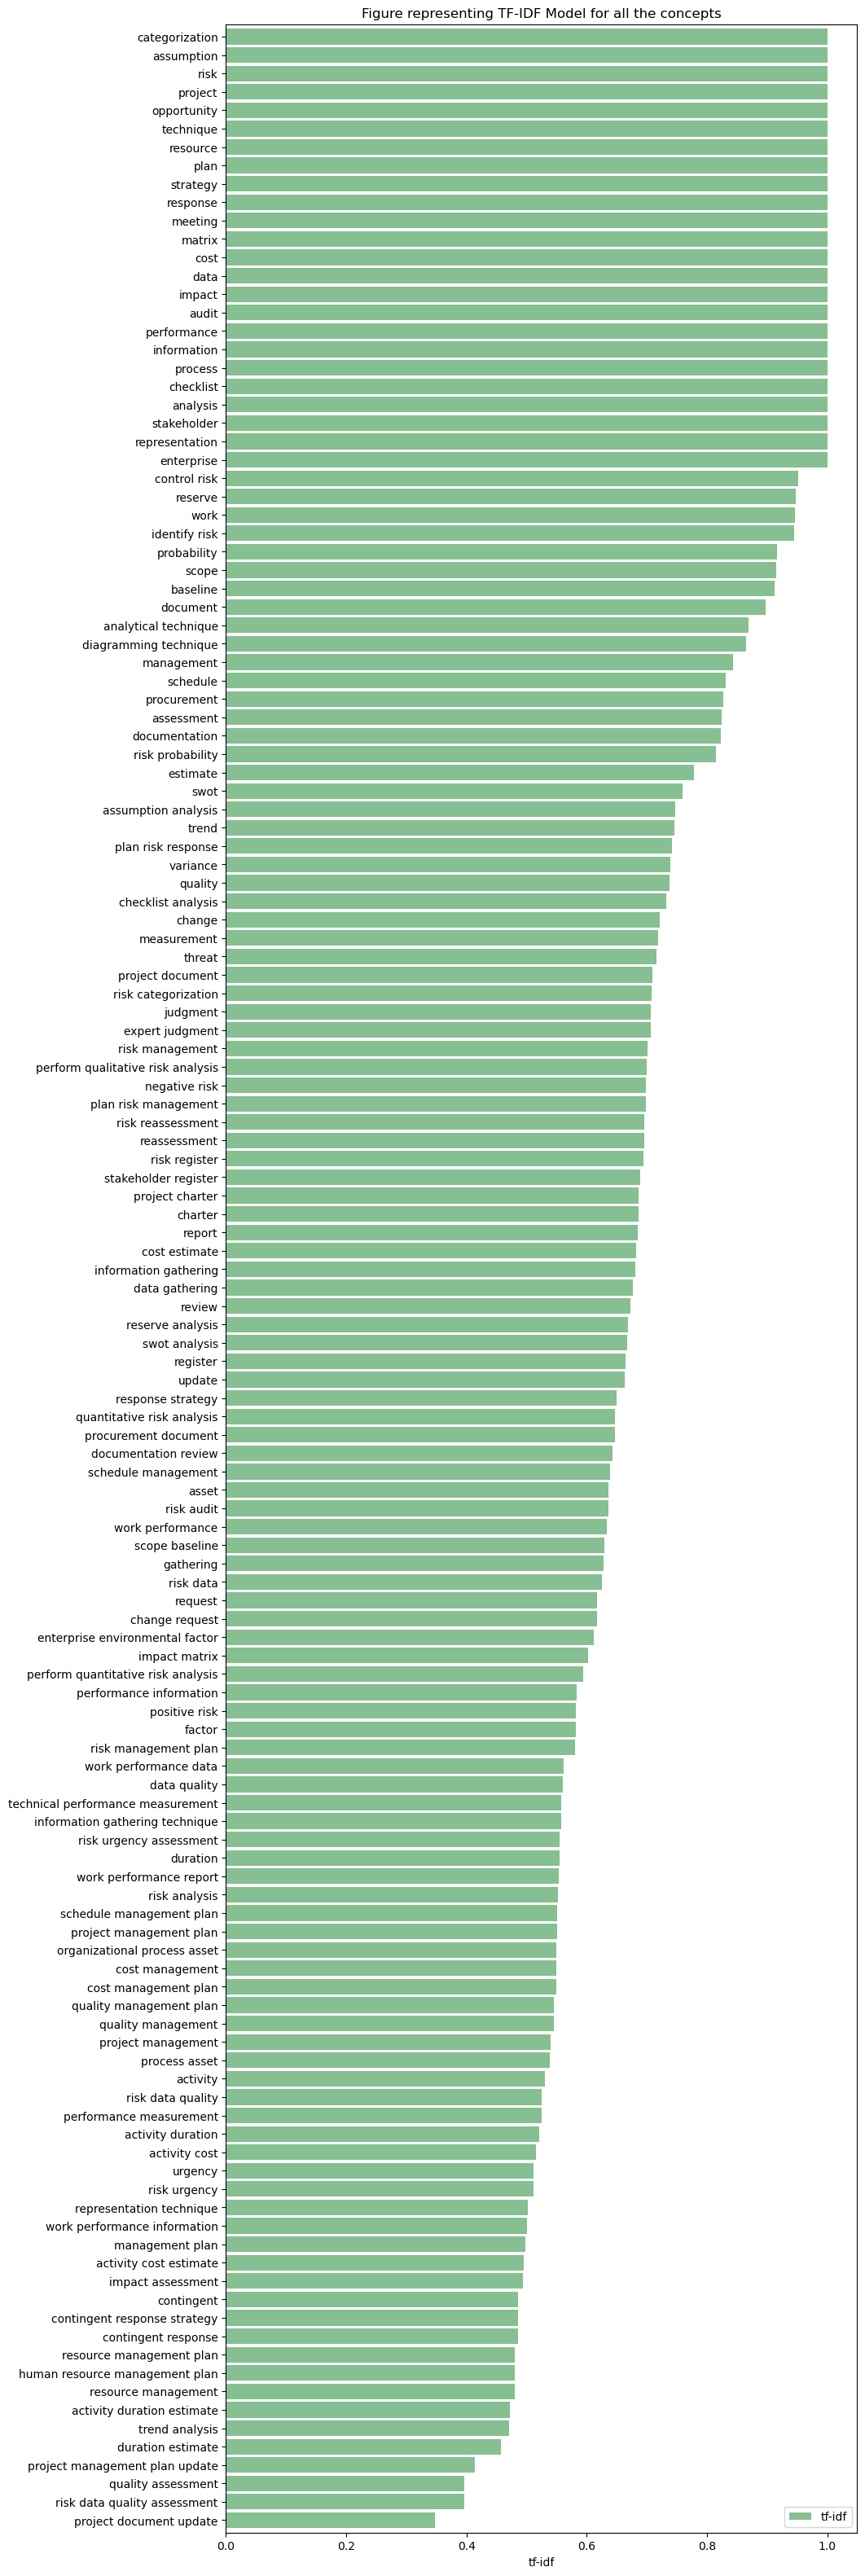

In [135]:
bar_chart_tf_idf(tf_measure_final_concepts, 'for all the concepts')

<h1><font color=darkred>Phase 2 : </font></h1> 
<h2> Enhancement of our data with PMI </h2>

PMI Text converting from pdf file

In [136]:
PMI=open('PMI.pdf','rb')
pdfreader=PyPDF2.PdfFileReader(PMI)
textPMI=""
number_of_pages=pdfreader.getNumPages()
for page_number in range(0,number_of_pages) :
  
     if (page_number!=118 ) :
        page=pdfreader.getPage(page_number) 
        textPMI = textPMI + page.extractText()+'\n'
        


PMI Text Cleaning

In [137]:
reference='©2009 Project Management Institute. \nPractice Standard for Project Risk Management\n'
textPMI=textPMI.replace(reference,' ')
sp=''
for i in string.punctuation :
    if i != '.': 
        sp=sp+i
symbl=['à', 'è', 'ì', 'ò', 'ù', 'À', 'È', 'Ì', 'Ò', 'Ù','á','é', 'í', 'ó', 'ú', 'ý' ,'Á', 'É', 'Í', 'Ó', 'Ú', 'Ý','â', 'ê', 'î', 'ô', 'û', 'Â', 'Ê', 'Î', 'Ô', 'Û',
'ã', 'ñ', 'õ', 'Õ', 'Ã', 'Ñ','ä', 'ë', 'ï', 'ö', 'ü', 'ÿ', 'Ä', 'Ë', 'Ï', 'Ö', 'Ü', 'Ÿ','å', 'Å','æ', 'Æ','ç', 'Ç','ð', 'Ð','ø', 'Ø','¿','¡','ß']

def cleaning(text):
    for char in symbl :
        text = text.replace(char, ' ')
#     for char in string.punctuation:
#         if i != '.': 
#             text = text.replace(char, ' ')
    text=text.replace('Ó',' ').replace('Õ','' ).replace('ð',' ')
    text=text.replace('Þ',' ').replace('¥',' ').replace('ß',' ')
    text=text.replace('11.',' 11.')
    text=text.replace('˜',' ').replace('•','')
    text = text.replace("\nem", " ").replace("™", "'").replace("˚"," ").replace("œ", " ").replace("š"," ")
    text=text.replace('\n',' ') 
    text=text.lower()
    text= text.translate(str.maketrans('', '', '!"#$%&\'()*+,-/:;<=>@[\\]^_`{|}~'))
    text = re.sub(r'[*\d]', '', text)
    text = re.sub(r'[^(\w\s.?)]', '', text)
    text = re.sub(' +', ' ', text)
    return text

In [138]:
textPMI = cleaning(textPMI)

In [139]:
objpmi=preprocess(textPMI)
objpmi

22726


,Concepts
0,project
1,management
2,institute
3,practice
4,standard
...,...
7298,impact calculation risk
7299,indexrisk model risk
7300,threshold risk interrelationship
7301,secondary risk stakeholdercommunication


In [140]:
conp=list(set(objpmi['Concepts'].tolist()))

## Consecutive Nouns Extraction

In [141]:
data=data_split(textPMI)
tagged = pos_tagging_nltk(data)
def PMI_cocat(tagged_sentences):
    Key_words = []
    for sent in tagged_sentences :
        ch=""
        for word, tag in sent:
            if (tag[0] == 'N' ):
                ch+=word+' '
            else :      
                if ch !="" :
                    ch=ch[:-1]
                    Key_words.append(ch[:-1]) 
                    ch=""
    return Key_words

In [142]:
L=PMI_cocat(tagged)
intersec1=list(set(L) & set(conp))
intersec1

['calibrate preference',
 'value formula',
 'definition',
 'forum',
 'entail',
 'enforce compliance content',
 'information result',
 'forecast',
 'document result',
 'team member',
 'interest',
 'sign',
 'plan risk response',
 'example',
 'group',
 'chapter system dynamic',
 'extension',
 'c',
 'dappendix risk',
 'measure',
 'mark',
 'risk action owner',
 'support',
 'threat',
 'one',
 'impact across objective',
 'contribution',
 'fallback plan',
 'end date',
 'procedure',
 'use',
 'liance planning session',
 'process asset',
 'phrase',
 'response technique',
 'tolerance',
 'revision',
 'participant',
 'comply organization',
 'expenditure',
 'eliminate threat',
 'practice',
 'involve key stakeholder',
 'risk owner',
 'acceptance entail',
 'c risk',
 'involve',
 'decisionsupport technique',
 'track condition',
 'ballot',
 'investment',
 'life cycle risk',
 'estimate',
 'risk characteristic',
 'signi cant contributor',
 'risk impact',
 'address barrier',
 'cause',
 'applicationinfluence

### Filetring :

In [143]:
L01=[]
for i in intersec1 :
    if len(i)>4 :
        L01.append(i)
L02=spli_jnt(L01)

In [144]:
L03=[]
for l1 in L02 :
    for l2 in l1 :
        if (len(l2) < 4) :
            L02.remove(l1)  

In [145]:
final_list=[]
ch=''
for l2 in L02 :
    ch=' '.join(l2) 
    final_list.append(ch)
    ch=''

In [146]:
len(final_list)

451

In [147]:
final_list

['calibrate preference',
 'value formula',
 'definition',
 'forum',
 'entail',
 'enforce compliance content',
 'information result',
 'forecast',
 'document result',
 'team member',
 'interest',
 'plan risk response',
 'example',
 'group',
 'chapter system dynamic',
 'extension',
 'dappendix risk',
 'measure',
 'risk action owner',
 'support',
 'threat',
 'impact across objective',
 'contribution',
 'fallback plan',
 'procedure',
 'liance planning session',
 'process asset',
 'phrase',
 'response technique',
 'tolerance',
 'revision',
 'participant',
 'comply organization',
 'expenditure',
 'eliminate threat',
 'practice',
 'risk owner',
 'acceptance entail',
 'involve',
 'decisionsupport technique',
 'track condition',
 'ballot',
 'investment',
 'life cycle risk',
 'estimate',
 'risk characteristic',
 'signi cant contributor',
 'risk impact',
 'address barrier',
 'cause',
 'applicationinfluence diagram',
 'practice project',
 'risk management resource',
 'problem',
 'work product',
 '

# Synonymes

extract synonyme of word

In [148]:
from nltk.corpus import wordnet as wn
def syno(one_word):
    L_syn = []
    if nltk.tag.pos_tag(['one_word'])[0][1] == 'NN':
        syn = wn.synsets(one_word,pos=wn.NOUN)
        for i, syn in enumerate(syn):
            L_syn.append(syn.name())
        
        s2 = ".n"
        L_syn_clean = []
        for l in L_syn:
            pos = l.find(s2)
            new_word = l[:pos]
            L_syn_clean.append(new_word) 
    
    elif nltk.tag.pos_tag(['one_word'])[0][1] == 'VB':
        L_syn = []
        syn = wn.synsets(one_word,pos=wn.VERB)
        for i, syn in enumerate(syn):
            L_syn.append(syn.name())
        
        s2 = ".v"
        L_syn_clean = []
        for l in L_syn:
            pos = l.find(s2)
            new_word = l[:pos]
            L_syn_clean.append(new_word)       
            
    return list(set(L_syn_clean))

extract synonyme of sent 

In [149]:
def ListOfSyn(sents):
    ListeSyn=[]
    
    tt2 =[]
    listOfList = []
    for s in sents:
        listOfList = s.split(" ")
        listOfList.append(listOfList)
        listOfList.pop()
        tt2.append(listOfList)

    for l1 in tt2:
        #1 mot
        if len(l1) == 1:
            for i in l1:
                L1 = syno(i)
            if L1:
                
                ListeSyn.append(list(set(L1)))
            else:
                ListeSyn.append(l1)
            
        #2 mots
        elif len(l1) == 2:
            for i in l1:
                L20 = syno(l1[0])
                L21 = syno(l1[1])
                lg20 = len(L20)
                lg21 = len(L21)
             #concat
            for j in range (0,lg20):
                liste = []
                for v in range (0,lg21):  
                    X=L20[j]+" "+L21[v]
                    liste.append(X)
            if liste:
                ListeSyn.append(list(set(liste)))
            else:
                ListeSyn.append(list(set(l1)))
                
   
        #3 mots    
        elif len(l1) == 3:
            for i in l1:
                L30 = syno(l1[0])
                L31 = syno(l1[1])
                L32 = syno(l1[2])
                lg30 = len(L30)
                lg31 = len(L31)
                lg32 = len(L32)
            #concat
            for j in range (0,lg30):
                liste = []
                for v in range (0,lg31):
                    for p in range (0,lg32):
                        X=L30[j]+" "+L31[v]+" "+L32[p]
                        liste.append(X)
            if liste:
                
                ListeSyn.append(list(set(liste)))
            else:
                ListeSyn.append(list(set(l1)))
            
        #4 mots
        elif len(l1) == 4:
            for i in l1:
                L40 = syno(l1[0])
                L41 = syno(l1[1])
                L42 = syno(l1[2])
                L43 = syno(l1[3])
                lg40 = len(L40)
                lg41 = len(L41)
                lg42 = len(L42)
                lg43 = len(L43)
            for j in range (0,lg40):
                liste =[]
                for v in range (0,lg41):
                    for p in range (0,lg42):
                        for t in range (0,lg43):
                            X=L40[j]+" "+L41[v]+" "+L42[p]+" "+L43[t]
                            liste.append(X)
            if liste:
                ListeSyn.append(list(set(liste)))
            else:
                ListeSyn.append(list(set(l1)))
    
    return ListeSyn

In [150]:
synor = ListOfSyn(final_concepts)

In [151]:
synor

[['undertaking management design', 'undertaking management plan'],
 ['design', 'plan'],
 ['management plan', 'management design'],
 ['management'],
 ['undertaking management'],
 ['project', 'undertaking'],
 ['undertaking charter'],
 ['charter'],
 ['stakeholder register', 'stakeholder cash_register'],
 ['register', 'cash_register'],
 ['stakeholder'],
 ['environmental', 'enterprise', 'factor'],
 ['agent', 'factor', 'divisor', 'gene', 'component'],
 ['enterprise'],
 ['organizational', 'process', 'asset'],
 ['asset'],
 ['procedure asset'],
 ['summons', 'procedure', 'process'],
 ['risk management plan', 'risk management design'],
 ['risk management'],
 ['hazard', 'risk'],
 ['risk management'],
 ['technique', 'proficiency'],
 ['expert sagacity', 'expert opinion', 'expert judgment'],
 ['judgment', 'sagacity', 'opinion'],
 ['meeting', 'confluence', 'merging'],
 ['cost management plan', 'cost management design'],
 ['cost management'],
 ['price', 'monetary_value', 'cost'],
 ['agenda management d

In [152]:
jarowinkler = JaroWinkler()
d = final_concepts
merge=[]
for i in d:
    s=[i]
    for j in final_list:
        if (jarowinkler.similarity(i,j) > 0.75):
            s.append(j)
    merge.append(s)

merge

[['project management plan',
  'project management rule',
  'project management characteristic',
  'project completion date',
  'project element',
  'projection',
  'project outcome',
  'project management tool',
  'project',
  'project management method',
  'project team',
  'project model',
  'project manager',
  'project management discipline',
  'project team stakeholder',
  'project management practitioner',
  'project plan',
  'project result',
  'project stage',
  'project team member'],
 ['plan', 'plan risk response', 'plan objective', 'planning purpose'],
 ['management plan',
  'manage risk',
  'management expectation',
  'management reserve fund',
  'manage',
  'management process objective',
  'management process result',
  'management rule'],
 ['management',
  'risk management resource',
  'manage risk',
  'risk management rule',
  'management expectation',
  'risk management action',
  'statement',
  'management reserve fund',
  'manage',
  'risk management procedure',
  '

In [153]:
allSyno =[]
for l in range(0,len(final_concepts)):    
    allSyno.append(list(set(merge[l][1:]+synor[l][:-1])))
allSyno


[['project model',
  'undertaking management design',
  'project management practitioner',
  'project completion date',
  'project management method',
  'project team stakeholder',
  'project management rule',
  'project plan',
  'project manager',
  'project element',
  'project management discipline',
  'project result',
  'project team member',
  'project team',
  'projection',
  'project outcome',
  'project management characteristic',
  'project stage',
  'project management tool',
  'project'],
 ['design', 'plan objective', 'planning purpose', 'plan risk response'],
 ['management rule',
  'management expectation',
  'management plan',
  'management process result',
  'management process objective',
  'manage risk',
  'manage',
  'management reserve fund'],
 ['risk management resource',
  'statement',
  'management rule',
  'management expectation',
  'risk management procedure',
  'management process result',
  'risk management rule',
  'risk management action',
  'management pro

In [154]:
final_concepts

['project management plan',
 'plan',
 'management plan',
 'management',
 'project management',
 'project',
 'project charter',
 'charter',
 'stakeholder register',
 'register',
 'stakeholder',
 'enterprise environmental factor',
 'factor',
 'enterprise',
 'organizational process asset',
 'asset',
 'process asset',
 'process',
 'risk management plan',
 'risk management',
 'risk',
 'analytical technique',
 'technique',
 'expert judgment',
 'judgment',
 'meeting',
 'cost management plan',
 'cost management',
 'cost',
 'schedule management plan',
 'schedule management',
 'schedule',
 'quality management plan',
 'quality management',
 'quality',
 'human resource management plan',
 'resource management plan',
 'resource management',
 'resource',
 'scope baseline',
 'baseline',
 'scope',
 'activity cost estimate',
 'estimate',
 'cost estimate',
 'activity cost',
 'activity',
 'activity duration estimate',
 'duration estimate',
 'duration',
 'activity duration',
 'project document',
 'document

In [155]:
listOfSyn = ListOfSyn(final_concepts)
bigD = defaultdict(list)

for i in range(0,len(final_concepts)):
    bigD[final_concepts[i]] = allSyno[i]

In [156]:
bigD = dict(bigD)

In [157]:
bigD

{'project management plan': ['project model',
  'undertaking management design',
  'project management practitioner',
  'project completion date',
  'project management method',
  'project team stakeholder',
  'project management rule',
  'project plan',
  'project manager',
  'project element',
  'project management discipline',
  'project result',
  'project team member',
  'project team',
  'projection',
  'project outcome',
  'project management characteristic',
  'project stage',
  'project management tool',
  'project'],
 'plan': ['design',
  'plan objective',
  'planning purpose',
  'plan risk response'],
 'management plan': ['management rule',
  'management expectation',
  'management plan',
  'management process result',
  'management process objective',
  'manage risk',
  'manage',
  'management reserve fund'],
 'management': ['risk management resource',
  'statement',
  'management rule',
  'management expectation',
  'risk management procedure',
  'management process result

In [158]:
def nbEspace(sent):
    nb = 0
    for i in sent:
        if i == ' ':
            nb+=1
    return nb

In [159]:
for key, value in bigD.items():
    s = []
    for v in value:
       
        if ( (nbEspace(key) == nbEspace(v)) and (key!= v )):
            s.append(v)
            
            
    bigD[key] = s
            

In [160]:
bigD

{'project management plan': ['undertaking management design',
  'project management practitioner',
  'project completion date',
  'project management method',
  'project team stakeholder',
  'project management rule',
  'project management discipline',
  'project team member',
  'project management characteristic',
  'project management tool'],
 'plan': ['design'],
 'management plan': ['management rule',
  'management expectation',
  'manage risk'],
 'management': ['statement', 'manage'],
 'project management': ['project model',
  'project attitude',
  'project stakeholder',
  'project lesson',
  'project plan',
  'project manager',
  'project element',
  'project result',
  'project risk',
  'project team',
  'project outcome',
  'project objective',
  'project condition',
  'project stage'],
 'project': ['practice', 'promise', 'objective', 'projection', 'problem'],
 'project charter': ['project model',
  'project decision',
  'proportion characteristic',
  'project attitude',
  'proj

<h1><font color=darkred>Phase 3 : </font></h1> 
<h2> Ontology generation </h2>

Ontology is the science of what is, of the kinds and structures of objects. In simple terms, ontology seeks the classification and explanation of entities. Ontology is about the object of inquiry, what you set to examine.


### Creating OWL with rdflib

In [161]:
data=df_triple.reset_index(inplace=True)

In [162]:
df_triple.reset_index(inplace=True)
data=df_triple

In [163]:

data=data.drop(columns=['index', 'level_0'])

In [164]:
data

,Sentence,Subject,Predicate,Object
0,enterprise develop project environmental mana...,enterprise,develop,plan
1,enterprise environmental factor can influence...,factor,influence,process
2,organizational process asset can influence pl...,asset,influence,process
3,meeting project team hold planning meeting de...,meeting,develop,plan
4,quality management plan provides a baseline o...,plan,provide,baseline
5,project requires external procurement of reso...,project,require,procurement
6,documentation review a structured review of p...,documentation,review,review
7,swot analysis identifies opportunity for proj...,analysis,identify,opportunity
8,swot analysis identifies opportunity for proj...,project,arise,threat
9,expert judgment risk may be identified direct...,risk,identify,project


In [165]:
final_df_concepts = finalDf[finalDf['Type'].isin(['------->'])]

In [166]:
final_df_process[final_df_process['Process_Name']=='identify risk']

,Concept,Type,Definition,Process_Name
31,risk management plan,Has_inputs,key element of the risk management plan that ...,identify risk
37,cost management plan,Has_inputs,the cost management plan provides process and...,identify risk
43,schedule management plan,Has_inputs,the schedule management plan provides insight...,identify risk
49,quality management plan,Has_inputs,the quality management plan provides a baseli...,identify risk
55,human resource management plan,Has_inputs,the human resource management plan provides g...,identify risk
62,scope baseline,Has_inputs,project assumption are found in the project s...,identify risk
65,activity cost estimate,Has_inputs,activity cost estimate review are useful in i...,identify risk
71,activity duration estimate,Has_inputs,activity duration estimate review are useful ...,identify risk
77,stakeholder register,Has_inputs,information about the stakeholder is useful f...,identify risk
80,project document,Has_inputs,project document provide the project team wit...,identify risk


In [167]:
final_df_process.loc[31,'Definition']

' key element of the risk management plan that contribute to the identify risk . process are the assignment of role and responsibilities, provision for risk management activity in the budget . and schedule, and category of risk , which are sometimes expressed as a risk breakdown structure figure '

In [168]:
def_in2.iloc[0]['def']

' key elements of the risk management plan that contribute to the identify risk . process are the assignments of roles and responsibilities, provision for risk management activities in the budget . and schedule, and categories of risk , which are sometimes expressed as a risk breakdown structure figure '

In [169]:
def_out1.iloc[0]['def']

' the risk management plan is a component of the project management plan and describes how risk management . activities will be structured and performed. the risk management plan includes the following. •\t methodology. defines the approaches, tools, and data sources that will be used to perform risk . management on the project •\t roles and responsibilities. defines the lead, support, and risk management team members for each . type of activity in the risk management plan, and clarifies their responsibilities •\t budgeting. estimate funds needed, based on assigned resources, for inclusion in the cost baseline and . establishes protocols for application of contingency and management reserves •\t timing. defines when and how often the risk management processes will be performed throughout the . project life cycle, establishes protocols for application of schedule contingency reserves, and establishes . risk management activities for inclusion in the project schedule  . this copy is a pm

In [170]:
df_dataproperty.reset_index(inplace=True)

In [171]:
df_individual.reset_index(inplace=True)

In [172]:
df_entity.reset_index(inplace=True)

#### RDFLIB

RDFLib aims to be a pythonic RDF API. RDFLib's main data object is a Graph which is a Python collection of RDF Subject, Predicate, Object Triples.Thanks to RDFLib, we can convert the obtained data frames into a well structured owl file.

In [173]:
from rdflib.namespace import DC, DCTERMS, DOAP, FOAF, OWL, RDF, RDFS, SKOS, VOID, XMLNS, XSD
from rdflib import URIRef, BNode, Literal, Namespace, Graph
from rdflib.extras import describer

The most direct way to create a Graph is simply using the function Graph():

In [174]:
g= Graph()
g.bind("owl",OWL)
g.bind("pr","http://example.org/projectOntology/")
ns_url = "http://example.org/projectOntology/"
g.add((URIRef('http://example.org/projectOntology/'), RDF.type, OWL.Ontology ))

<Graph identifier=N75279f2558524b49b653d4d37dbd26a1 (<class 'rdflib.graph.Graph'>)>

### Adding Processes


After creating the graph and setting our URIRef, we will start by adding the 6 main processes of the project risk management which are :


In [175]:
df_process=final_df_process.drop_duplicates(subset='Process_Name', keep='first', inplace=False)
df_process=df_process['Process_Name']
df_process

0                    plan risk management
31                          identify risk
120     perform qualitative risk analysis
177    perform quantitative risk analysis
227                    plan risk response
265                          control risk
Name: Process_Name, dtype: object

In [176]:
for c in df_process:  
    
    cl = URIRef(ns_url+c.replace(" ","_"))
    g.add((cl, RDF.type, OWL.Class))
    clOutput =URIRef(ns_url+c.replace(" ","_")+"_"+"Outputs".replace(" ","_"))
    g.add((clOutput, RDF.type, OWL.Class))
    clTools =URIRef(ns_url+c.replace(" ","_")+"_"+"Tools and techniques".replace(" ","_"))
    g.add((clTools, RDF.type,OWL.Class))
    clInput =URIRef(ns_url+c.replace(" ","_")+"_"+"Inputs".replace(" ","_"))
    g.add((clInput, RDF.type, OWL.Class))
    
for o in final_df_process.index :
    for c in df_process: 
        if c == final_df_process.loc[o,'Process_Name'] and  final_df_process.loc[o,'Type'] == 'Has_outputs' :
        
            clo = URIRef(ns_url+c.replace(" ","_")+"_"+"Outputs".replace(" ","_"))
            ind = URIRef(ns_url+final_df_process.loc[o,'Concept'].replace(" ","_"))
            g.add((ind, RDF.type, clo))
        

        if  c == final_df_process.loc[o,'Process_Name'] and final_df_process.loc[o,'Type'] == 'Has_inputs' :


            clo = URIRef(ns_url+c.replace(" ","_")+"_"+"Inputs".replace(" ","_"))
            ind = URIRef(ns_url+final_df_process.loc[o,'Concept'].replace(" ","_"))
            g.add((ind, RDF.type, clo))
     
        if c == final_df_process.loc[o,'Process_Name'] and final_df_process.loc[o,'Type'] == 'Has_Technics_Tools' :


            clo = URIRef(ns_url+c.replace(" ","_")+"_"+"Tools and techniques".replace(" ","_"))
            ind = URIRef(ns_url+final_df_process.loc[o,'Concept'].replace(" ","_"))
            g.add((ind, RDF.type, clo))
   



### Adding Object Property

In [177]:
for i in final_df_process.index :
    if final_df_process.loc[i,'Type'] == 'Has_Technics_Tools' :
        
        c = URIRef(ns_url+final_df_process.loc[i,'Type'].replace(" ","_"))
        domaine = URIRef(ns_url+final_df_process.loc[i,'Process_Name'].replace(" ","_"))
        rang = URIRef(ns_url+final_df_process.loc[i,'Process_Name'].replace(" ","_")+"_Tools and techniques".replace(" ","_"))
    if final_df_process.loc[i,'Type'] == 'Has_inputs' :
        
        c = URIRef(ns_url+final_df_process.loc[i,'Type'].replace(" ","_"))
        domaine = URIRef(ns_url+final_df_process.loc[i,'Process_Name'].replace(" ","_"))
        rang = URIRef(ns_url+final_df_process.loc[i,'Process_Name'].replace(" ","_")+"_Inputs".replace(" ","_"))
    
    if final_df_process.loc[i,'Type'] == 'Has_outputs' :
        
        c = URIRef(ns_url+final_df_process.loc[i,'Type'].replace(" ","_"))
        domaine = URIRef(ns_url+final_df_process.loc[i,'Process_Name'].replace(" ","_"))
        rang = URIRef(ns_url+final_df_process.loc[i,'Process_Name'].replace(" ","_")+"_Outputs".replace(" ","_"))

    
    
    g.add((c, RDF.type, OWL.ObjectProperty))
    g.add((c, RDFS.domain, domaine))
    g.add((c, RDFS.range, rang))

In [178]:
final_df_process

,Concept,Type,Definition,Process_Name
0,project management plan,Has_inputs,"in planning risk management , all approved su...",plan risk management
6,project charter,Has_inputs,the project charter can provide various input...,plan risk management
9,stakeholder register,Has_inputs,"the stakeholder register, which contains all ...",plan risk management
12,enterprise environmental factor,Has_inputs,. the enterprise environmental factor that ca...,plan risk management
16,organizational process asset,Has_inputs,. the organizational process asset that can i...,plan risk management
...,...,...,...,...
308,variance,Has_Technics_Tools,many control process employ variance analysis...,control risk
309,trend analysis,Has_Technics_Tools,many control process employ variance analysis...,control risk
312,technical performance measurement,Has_Technics_Tools,technical performance measurement compare tec...,control risk
316,reserve analysis,Has_Technics_Tools,"throughout execution of the project, some ris...",control risk


### Adding Annotation isDefinedBy

In [179]:
process_definition

,Process_Name,Definiton
0,plan risk management,plan risk management is the process of defini...
1,identify risk,identify risk is the process of determining w...
2,perform qualitative risk analysis,perform qualitative risk analysis is the proc...
3,perform quantitative risk analysis,perform quantitative risk analysis is the pro...
4,plan risk response,plan risk response is the process of developi...
5,control risk,control risk is the process of implementing r...


In [180]:
for i in range(len(Def_process)) :
    c = URIRef(ns_url+process_definition.loc[i,'Process_Name'].replace(" ","_"))
    desc=process_definition.loc[i,'Definiton']
    definedby = Literal(desc,datatype=XSD.string)
    g.add((c, RDFS.isDefinedBy, definedby))


In [181]:
final_df_process = final_df_process.reset_index(drop=True)

In [182]:
for i in range(len(final_df_process)) :
    c = URIRef(ns_url+final_df_process.loc[i,'Concept'].replace(" ","_"))
    desc=final_df_process.loc[i,'Definition']
    definedby = Literal(desc,datatype=XSD.string)
    g.add((c, RDFS.isDefinedBy, definedby))

### Adding Annotation seeAlso

In [183]:
df_process_reset=df_process.reset_index(drop=True)

In [184]:
for i in range(len(df_process_reset)):
    c = URIRef(ns_url+df_process_reset[i].replace(" ","_"))
    for j in range(len(bigD[df_process_reset[i]])):
        syn = Literal( bigD[df_process_reset[i]][j] ,datatype=XSD.string)
        g.add((c, RDFS.seeAlso, syn))

In [185]:
df_synn_concept=final_df_process.reset_index(drop=True)

In [186]:
for i in range(len(df_synn_concept)):
    c = URIRef(ns_url+df_synn_concept.loc[i,'Concept'].replace(" ","_"))
    for j in range(len(bigD[ df_synn_concept.loc[i,'Concept'] ] )  ):
        syn = Literal( bigD[df_synn_concept.loc[i,'Concept']][j] ,datatype=XSD.string)
        g.add((c, RDFS.seeAlso, syn))

### Adding DataProperty

In [187]:
df_dataproperty2

,Domaine,Data_Property,Range
0,project charter,Described in,section 4.1.3.1.
1,stakeholder register,Described in,section 13.1.3.1.
2,enterprise environmental factors,Described in,section 2.1.5.
3,organizational process assets,Described in,section 2.1.4.
4,risk management plan,Described in,section 11.1.3.1.
5,cost management plan,Described in,section 7.1.3.1.
6,schedule management plan,Described in,section 6.1.3.1.
7,quality management plan,Described in,section 8.1.3.1.
8,human resource management plan,Described in,section 9.1.3.1.
9,scope baseline,Described in,section 5.4.3.1.


In [188]:
df_testsr = df_dataproperty2['Domaine'].str.lower()

In [189]:
for i in range(len(df_dataproperty2)):
    c = URIRef(ns_url+df_dataproperty2.loc[i,'Data_Property'].replace(" ","_"))
    domaine = URIRef(ns_url+df_dataproperty2.loc[i,'Domaine'].replace(" ","_"))
    g.add((c, RDF.type, OWL.DatatypeProperty))
    g.add((c, RDFS.domain, domaine))
    g.add((c, RDFS.range, XSD.string))

In [190]:
for i in range(len(df_dataproperty2)):
    indiv = URIRef(ns_url+df_dataproperty2.loc[i,'Domaine'].replace(" ","_"))
    section = Literal(df_dataproperty2.loc[i,'Range'],datatype=XSD.string)
    data_prop=URIRef(ns_url+df_dataproperty2.loc[i,'Data_Property'].replace(" ","_"))

    g.add((indiv,data_prop,section))

And finally we generate the owl file with serialize: 

In [191]:
g.serialize(destination='ontologyfinal.owl', format='turtle')

<Graph identifier=N75279f2558524b49b653d4d37dbd26a1 (<class 'rdflib.graph.Graph'>)>

## Evaluation 

In [192]:
!pip install rouge

In [193]:
from rouge import Rouge

In [194]:
all_data_combined =  final_df_process['Process_Name'].tolist() + final_df_process['Concept'].tolist()+ final_df_process['Definition'].tolist() + df_dataproperty['Range'].tolist() + df_dataproperty['Domaine'].tolist() + df_dataproperty['Data Property'].tolist()

In [195]:
ch=''
for e in all_data_combined:
    ch+='. '+str(e)

In [196]:
rouge = Rouge()
score=rouge.get_scores(ch, proc, avg=True)
print('Precision = '+str(score['rouge-1']['p']))
print('Recall = ' +str(score['rouge-1']['r']))
print('f-measure = '+str(score['rouge-1']['f']))

Precision = 0.7563417890520694
Recall = 0.8789759503491078
f-measure = 0.8130606337077021


In [197]:
requette = "give me the inputs of plan risk management"

In [198]:
final_df_process

,Concept,Type,Definition,Process_Name
0,project management plan,Has_inputs,"in planning risk management , all approved su...",plan risk management
1,project charter,Has_inputs,the project charter can provide various input...,plan risk management
2,stakeholder register,Has_inputs,"the stakeholder register, which contains all ...",plan risk management
3,enterprise environmental factor,Has_inputs,. the enterprise environmental factor that ca...,plan risk management
4,organizational process asset,Has_inputs,. the organizational process asset that can i...,plan risk management
...,...,...,...,...
76,variance,Has_Technics_Tools,many control process employ variance analysis...,control risk
77,trend analysis,Has_Technics_Tools,many control process employ variance analysis...,control risk
78,technical performance measurement,Has_Technics_Tools,technical performance measurement compare tec...,control risk
79,reserve analysis,Has_Technics_Tools,"throughout execution of the project, some ris...",control risk


<h1><font color=darkred>Phase 4 : </font></h1> 
<h2> Recommendation system algorithm </h2>

In [199]:
dataframeinputstools = pd.read_csv('dataframeinputstools.csv')
dfsection = pd.read_csv('dfsection.csv')
requete='what are plan risk management '
processpart=["Plan Risk Management","Identify Risks","Perform Qualitative Risk Analysis","Perform Quantitative Risk Analysis","Plan Risk Responses","Control Risks"]
def answertorequest(requete,processpart,dataframeinputstools,dfprocesstotalstotals):
    test=False
    requete=re.sub("[^a-zA-Z ]","",requete)
    requete=requete.lower()
    requete
    y=nlp(requete)
    
    LNOUN=[]
    for k in y:
        if k.pos_=='NOUN'or k.pos_=="VERB" or k.pos_=="PROPN" or k.pos_=="ADJ":
            LNOUN.append(k.text)
    
    print(LNOUN)
    answer=''
    ch=''
    for k in LNOUN:
        ch+=k+' '
    ch=ch.lstrip().rstrip()
    
    index=-1
    if 'input' in requete:
        for i in range(len(processpart)):
            if processpart[i].lower() in ch:
                index=i
        ch3=""
        for s in range(len(dataframeinputstools.loc[index,'inputs'])):
            ch3+=dataframeinputstools.loc[index,'inputs'][s]+ ""
        answer="The inputs of the process "+processpart[index]+" are "+ ch3
        answer+="\n"
        answer+=" SEE ALSO: Section "+dfsection.loc[4*index+1,"section"]+" "+dfsection.loc[4*index+1,"secabout"]+" Page "+str(dfsection.loc[4*index+1,"sectionpage"])
        test=True
    elif 'output' in requete:
        for i in range(len(processpart)):
            if processpart[i].lower() in ch:
                index=i
                print(index)
        ch3=""
        for s in range(len(dataframeinputstools.loc[index,'outputs'])):
            ch3+=dataframeinputstools.loc[index,'outputs'][s]+""
        answer="The outputs of the process "+ processpart[index]+ " are "+ch3
        answer+='\n'
        answer+= " SEE ALSO: Section "+dfsection.loc[4*index+3,'section']+" "+dfsection.loc[4*index+3,'secabout']+" Page "+str(dfsection.loc[4*index+3,'sectionpage'])
        test=True
    elif 'tool' in requete or 'technique' in requete:
        for i in range(len(processpart)):
            if processpart[i].lower() in ch:
                index=i
        ch3=''
        for s in range(len(dataframeinputstools.loc[index,'tools&techniques'])):
            ch3+=dataframeinputstools.loc[index,'tools&techniques'][s]+""
        answer="The tools&techniques of the process "+processpart[index]+" are "+ch3
        answer+="\n"
        answer+=" SEE ALSO: Section "+dfsection.loc[4*index+2,"section"]+" "+dfsection.loc[4*index+2,"secabout"]+" Page "+str(dfsection.loc[4*index+2,"sectionpage"])
        test=True
        
    elif 'definition' in requete:
        for i in range(len(processpart)):
            if processpart[i].lower() in ch :
                index=i
        answer="The definition of the process "+processpart[index]+" is "+process_definition.loc[index,'Definiton']
        answer+="\n"
        answer+="SEE ALSO: Section "+dfsection.loc[4*index,"section"]+" "+dfsection.loc[4*index,"secabout"]+" Page "+str(dfsection.loc[4*index,"sectionpage"])
        
        type(answer)
        test=True
    
    if test==False:
        for i in range(len(processpart)):
            if processpart[i].lower() in ch :
                index=i
                test=True
        if test==True:
            print(type(answer))
            answer="The definition of the process "+processpart[index]+" is4 "+ process_definition.loc[index,'Definiton']
            answer+=" \n "
            answer+="SEE ALSO: Section "+dfsection.loc[4*index,"section"]+" "+dfsection.loc[4*index,"secabout"]+" Page "+str(dfsection.loc[4*index,"sectionpage"])
    
    if test==False:
        for i in range(len(fdfp)):
            concept=fdfp.loc[i,'Concept']
            if concept in ch:
                test=True
                answer+='The definition of '+concept+' is '+ fdfp.loc[i,'Definition']+'\n'
                if fdfp.loc[i,'Type']=='Has_inputs':
                    answer+='It is an input of the process '+fdfp.loc[i,'Process_Name']+'\n'
                elif fdfp.loc[i,'Type']=='Has_outputs':
                    answer+='It is an output of the process '+fdfp.loc[i,'Process_Name']+'\n'
                else:
                    answer+='It is a tool & technique of the process '+fdfp.loc[i,'Process_Name']+'\n'
    
    if test==False:
        ch2=""
        LNOUN2=[]
        for k in LNOUN:
            y=nlp(requete)
            for k in y:
                if k.pos_ in['NOUN',"VERB","PROPN"] and k.text not in ["has","have"]:
                    LNOUN2.append(k.text)
        for k in LNOUN2:
            ch2+=k+" "
        ch2=ch2.lstrip().rstrip()
        
        jarowinkler=JaroWinkler()
        L_score=[]
        for i in range(len(dfprocesstotalstotals)):
            x=jarowinkler.similarity(dfprocesstotalstotals.loc[i,"Subject"],requete)
            L_score.append(x)
        dfscore=pd.DataFrame(list(zip(L_score,dfprocesstotalstotals.loc[:,0])),columns=['score','sentence'])
        dfscore=dfscore.sort_values(by='score',ascending=False)
        
        L_answer=[]
        for i in range(len(dfscore)):
            x=dfscore.loc[i,"score"]
            if x>0.9:
                L_answer.append(dfscore.loc[i,"sentence"])
                test=True
                
        L_answerclean=[]
        for l in L_answer:
            if l not in L_answerclean:
                L_answerclean.append(l)
        
        cpt=0
        for l in L_answerclean:
            if cpt<5:
                answer+=l+" "+'\n'
                cpt+=1
        
    if test==False:
        L_answer=[]
        for i in range(len(dfscore)):
            x=dfscore.loc[i,"score"]
            if x>0.8:
                L_answer.append(dfscore.loc[i,"sentence"])
                test=True
                
        L_answerclean=[]
        for l in L_answer:
            if l not in L_answerclean:
                L_answerclean.append(l)
        
        cpt=0
        answer="The closest answer to your request is: \n"
        for l in L_answerclean:
            if cpt<5:
                answer+=l+" "+'\n'
                cpt+=1
                
    return(answer)
            
print(answertorequest(requete,processpart,dataframeinputstools,data))

['plan', 'risk', 'management']
<class 'str'>
The definition of the process Plan Risk Management is4  plan risk management is the process of defining how to conduct risk management activity for a project. the . key benefit of this process is it ensures that the degree, type, and visibility of risk management are commensurate . with both the risk and the importance of the project to the organization. the risk management plan is vital to . communicate with and obtain agreement and support from all stakeholder to ensure the risk management process . is supported and performed effectively over the project life cycle.  
 SEE ALSO: Section 11.1 Plan Risk Management Page 313
